## Trabajo Práctico 2
#### Alumnos:

*   Facundo Gancedo Garcia
*   Gabriel Ezequiel Gonzalez
*   James Tuesta Alvarado


In [ ]:
#!pip install tensorflow

In [ ]:
#!pip install formulaic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from formulaic import Formula
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import keras
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors


#### 1. Preprocesamiento


1) Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.

In [ ]:
frb = pd.read_csv('/Users/facu/Labo de Datos/TP2/FBRef2020-21.csv') # Leemos el .csv y lo almacenamos como frb
frb.head() # Veamos cómo se ve

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [ ]:
# Veamos la cantidad de filas y columnas, y los tipos de datos
frb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 128 entries, Player to ProgPassReceived/90
dtypes: float64(115), int64(3), object(10)
memory usage: 2.8+ MB


Vemos que tiene 2822 filas y 128 columnas.

2) Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min)

In [ ]:
frb.Min # Visualizamos la columna "Min"

0       1777
1       2889
2       1260
3       1222
4       2813
        ... 
2818     647
2819    1391
2820    2609
2821    1289
2822    1187
Name: Min, Length: 2823, dtype: int64

In [ ]:
menos500 = frb['Min']<500 # Copiamos a una nueva variable las observaciones que no cumplen lo pedido
frb = frb[~menos500] # En el dataframe original dejamos solo lo que cumple, "restando" las observaciones que se encuentran en menos500

In [ ]:
frb # Lo visualizamos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


3) Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y luego las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.

In [ ]:
nulos = frb.isnull().sum() # Vemos la cantidad de NaN por columna
nulosMayores100 = nulos[nulos > 100].copy() # Vemos que columnas tienen más de 100 observaciones nulas
frb = frb.dropna(axis = 1, thresh = frb.shape[0]-100)# "thresh" es un parametro para eliminar las columnas (axis=1) donde
                                                     # tengo mas de "el total de filas - las filas nan". en este caso 1962-100,
                                                     # si tengo 1861 noNan, elimina la columna

nulosMayores100 # Visualizamos


SoT%           140
Gls/Shot       140
Gls/SoT        298
AvgShotDist    142
npxG/Shot      142
DribSucc%      117
dtype: int64

Como tengo 6 columnas con mas de 100 null, el dataframe debería tener ahora 122 columnas, chequeamos eso:


In [ ]:
print(f"La cantidad de filas es {frb.shape[0]} y la de columnas es de {frb.shape[1]}")

La cantidad de filas es 1962 y la de columnas es de 122


In [ ]:
frb = frb.dropna() # Eliminamos las filas con datos faltantes

4) Al finalizar la limpieza de datos, resetear los índices.


In [ ]:
frb.reset_index(drop=True, inplace=True)# "drop = True" para que no cree una columna nueva dejando el índice viejo como columna
frb # Compruebamos

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


5) Definir el DataFrame data_num que solo contenga las variables númericas, a partir de la columna Ast/90, inclusive. Para clustering y clasificación no vamos a utilizar las variables categóricas ni edad ni minutos jugados.

In [ ]:
data_num = frb.select_dtypes(np.number).copy() # Copiamos las columnas de frb que tienen valores numéricos
print(data_num.columns.get_loc('Ast/90')) # Vemos el índice de la columna Ast/90

6


In [ ]:
data_num = data_num.iloc[:,6:].copy() # Dejamos todas las columnas a partir de 'Ast/90' (inclusive) en adelante
data_num # Comprobamos

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


#### 2. Clustering

2a) Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.
 Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

In [ ]:
columns = data_num.nunique() # Veo las columnas que nos faltan como para darnos una idea cuales nos pueden ayudar a ver caracteristicas similares

print(columns.to_string()) # Imprimimos

Ast/90                   58
npG/90                   75
npG+A/90                 98
xA/90                    45
npxG/90                  68
npxG+xA/90               90
Shots/90                339
SoTs/90                 163
FKSht/90                 61
np:G-xG                  64
PassCmp/90              585
PassAtt/90              610
PassCmp%                360
TotDistPass/90         1775
PrgDistPass/90         1549
ShortCmp/90             543
ShortAtt/90             459
ShortCmp%               302
MedCmp/90               665
MedAtt/90               566
MedCmp%                 387
LongCmp/90              834
LongAtt/90              812
LongCmp%                521
KeyPass/90              269
PassIntoThird/90        584
PassIntoBox/90          249
CrossIntoBox/90         117
ProgPass/90             580
LivePassAtt/90          588
DeadPassAtt/90          712
FKPassAtt/90            350
TBCmp/90                 59
PassUnderPress/90       691
Switches/90             364
Crosses/90          

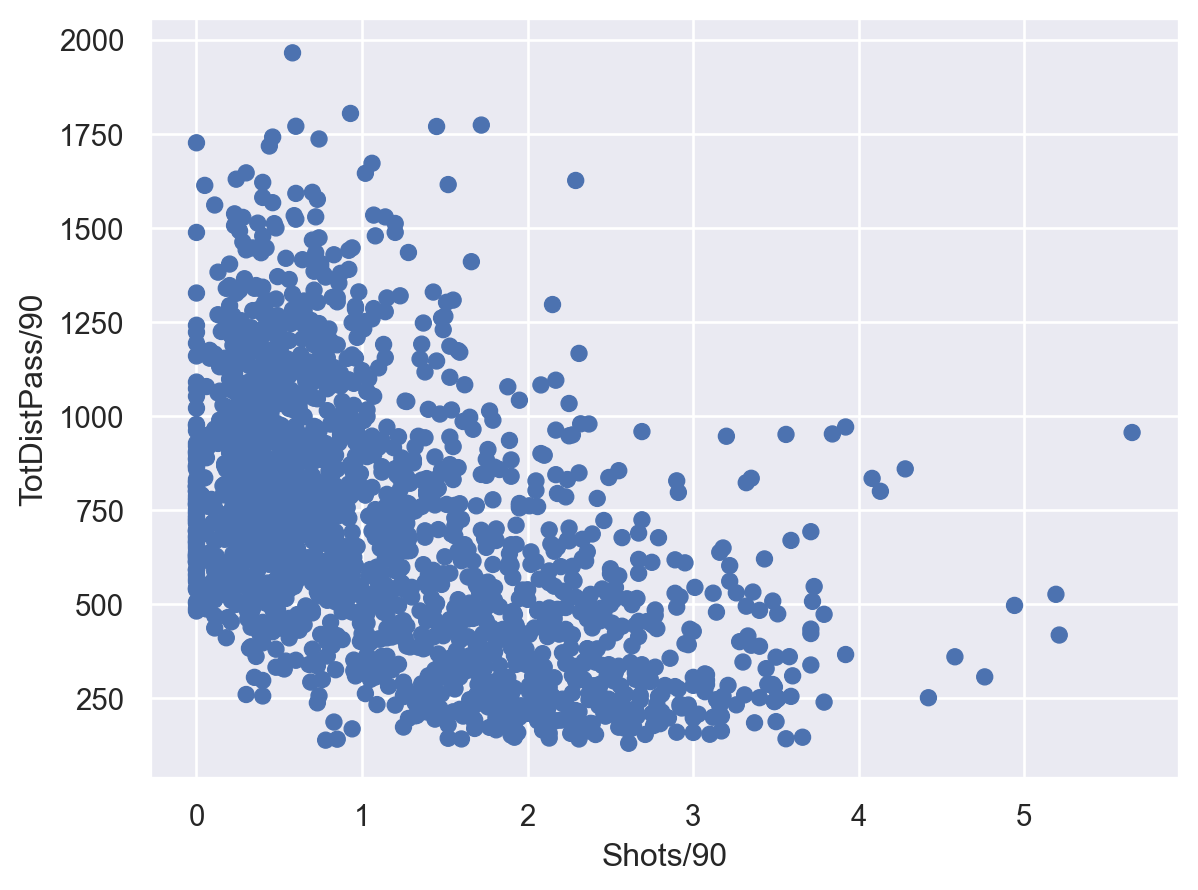

In [ ]:
(so.Plot(data_num, 'Shots/90', 'TotDistPass/90') # La idea es buscar dos variables que separen bastante por tipo de jugador,
                                                 # Tal vez los defensores dan pases más largos y disparan menos y viceversa para los delanteros
 .add(so.Dot())
 )

Acá pareciera haber algún tipo de relación entre distancia de los pases y tiros al arco por 90', aún así, no se distinguen clusters

 2b) Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? ¿A qué características de los jugadores pueden corresponder los clusters? ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)


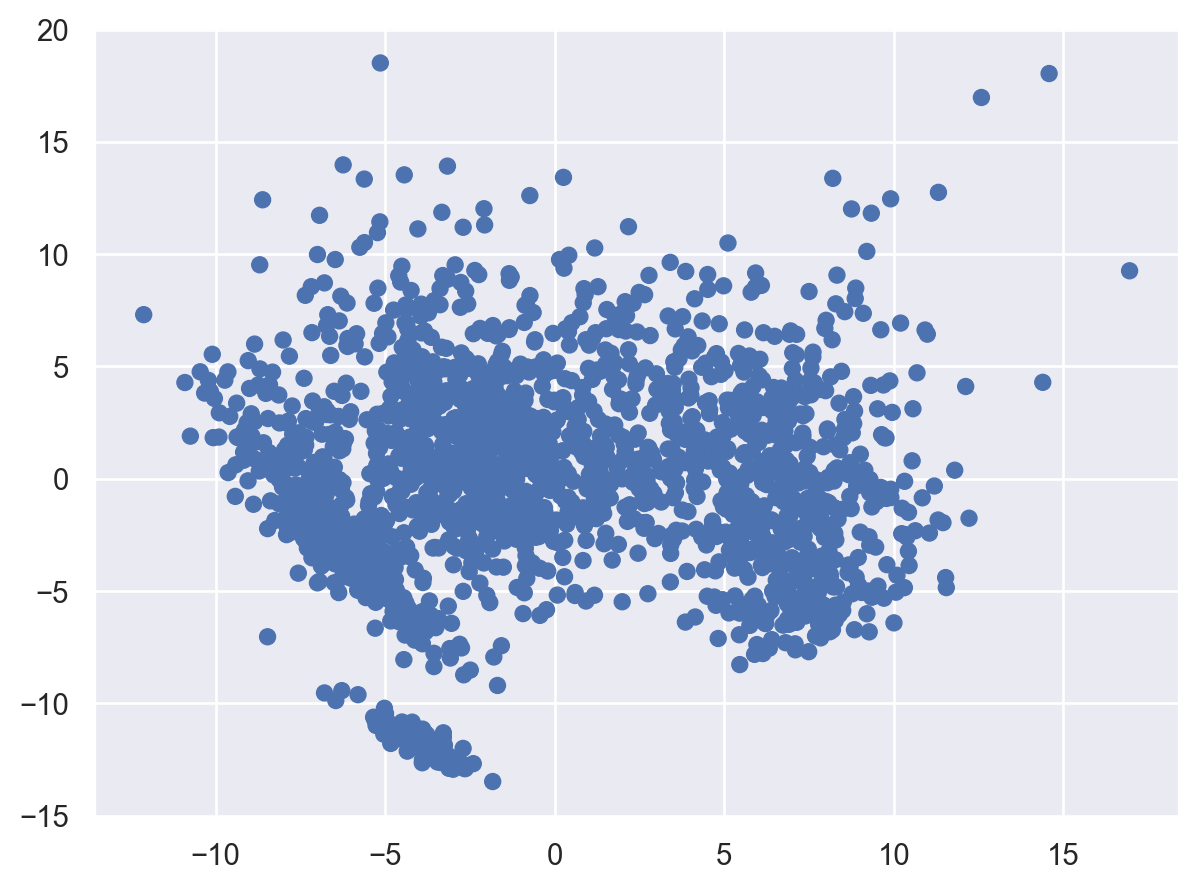

In [ ]:
scaler_pca = StandardScaler()
data_num_star = scaler_pca.fit_transform(data_num) # Escalamos los datos a media cero y varianza 1

pca = PCA(n_components=2) # Inicializamos el modelo buscando encontrar las dos primeras componentes principales

stats_pca = pca.fit_transform(data_num_star) # Observaciones transformadas al nuevo sistema de coordenadas

# Graficamos
(
    so.Plot(x = stats_pca[:,0], y = stats_pca[:,1])
    .add(so.Dot())
)

Se distinguen dos clusters bien definidos, podríamos pensar que tal vez el cluster grande se divide en tres, pero los puntos están muy juntos en las "divisiones". Para tratar de ver si podemos observar distintos clusters que nos ayuden a determinar las posiciones de cada jugador, coloreamos los puntos según la posición en la que juega el jugador correspondiente.

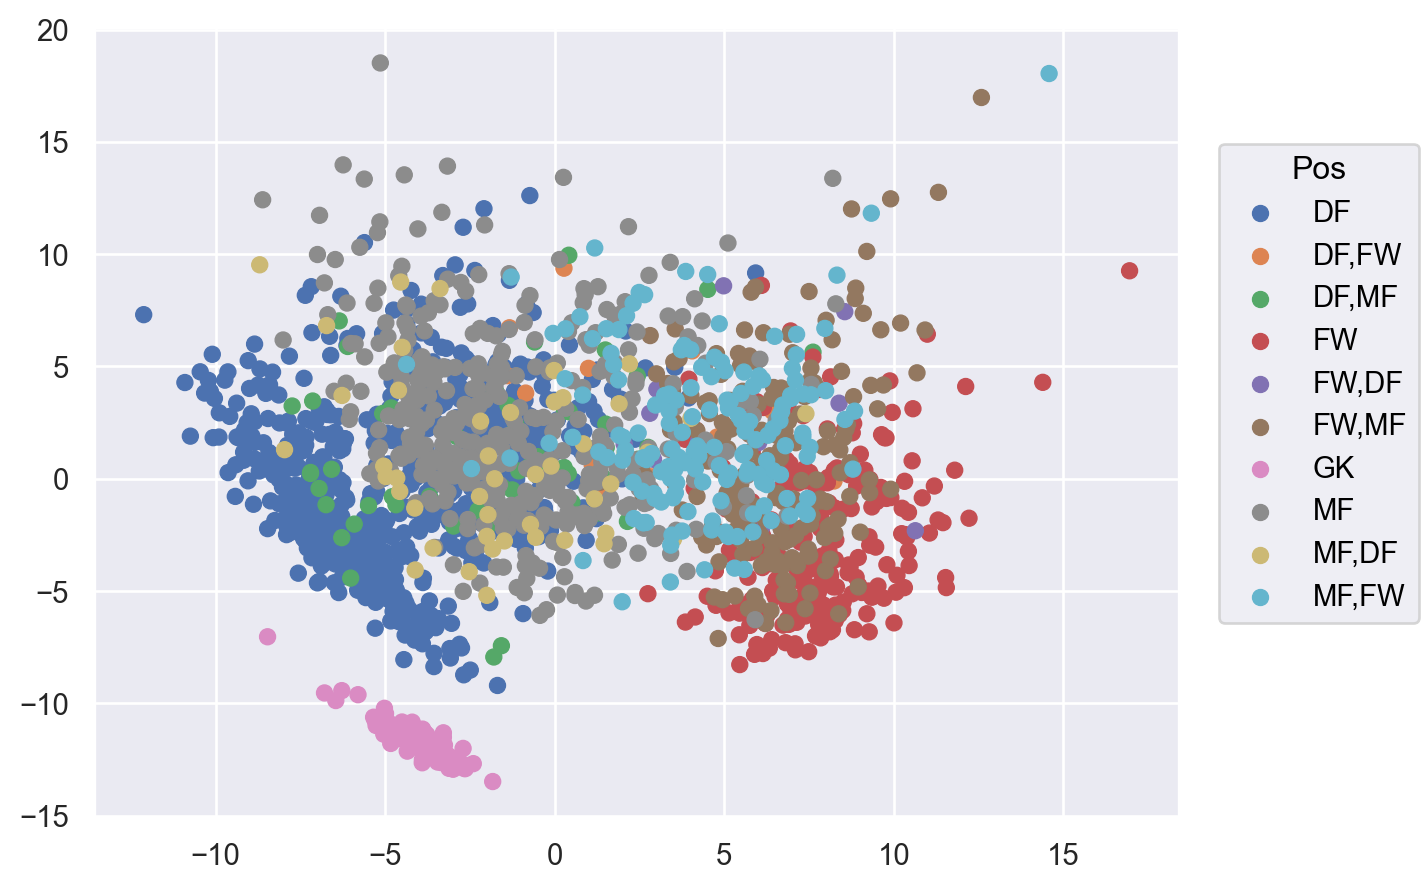

In [ ]:
(
    so.Plot(x=stats_pca[0:,0],y=stats_pca[0:,1],color = frb["Pos"])
    .add(so.Dot())
)

Así, podemos ver que coloreando por posición, solo podemos distinguir dos clusters grandes, en el cuál se puede diferenciar solo a los arqueros.

In [ ]:
componentes = pca.components_ # Vemos los coeficientes para cada caracteristica

Armamos un dataframe con los coeficientes de cada componente porque es más fácil de manipular

In [ ]:
coef = pd.DataFrame(componentes) # Armamos un dataframe

Obtenemos los valores máximos y minimos para cada componente, para determinar cuál tiene el mayor valor absoluto y vemos también cual es el coeficiente que le corresponde.

In [ ]:
max_coef = coef.loc[0].idxmax()# Valor máximo para la primer componente principal
min_coef = coef.loc[0].idxmin()# Valor minimo para la primer componente principal
print(f"Indices en los cuales se encuentran los valores min:{min_coef} y max:{max_coef} de la primera componente.")
print(f"Valores de cada uno: {coef.loc[0][min_coef]},{coef.loc[0][max_coef]}")

max_coef2 = coef.loc[1].idxmax()# Lo mismo para la segunda componente
min_coef2 = coef.loc[1].idxmin()
print(f"Indices en los cuales se encuentran los valores min: {min_coef2} y max: {max_coef2} de la segunda componente.")
print(f"Valores de cada uno: {coef.loc[0][min_coef2]},{coef.loc[0][max_coef2]}")

Indices en los cuales se encuentran los valores min:85 y max:105 de la primera componente.
Valores de cada uno: -0.16534981688900452,0.1679680905874152
Indices en los cuales se encuentran los valores min: 84 y max: 28 de la segunda componente.
Valores de cada uno: -0.09524129689722435,-0.03414034944734894


Tomamos como máximo coeficiente al 0.167 para la primera componente y al -0.09 para la segunda. Hay muchos otros coeficientes con valores muy cercanos.

In [ ]:
print(f"Estos índices corresponden a las siguientes columnas: 105 = {data_num.columns[105]}, y  84 = {data_num.columns[84]}.")

Estos índices corresponden a las siguientes columnas: 105 = ProgPassReceived/90, y  84 = Def PenTchs/90.


Graficamos ahora los datos en esas dos variables

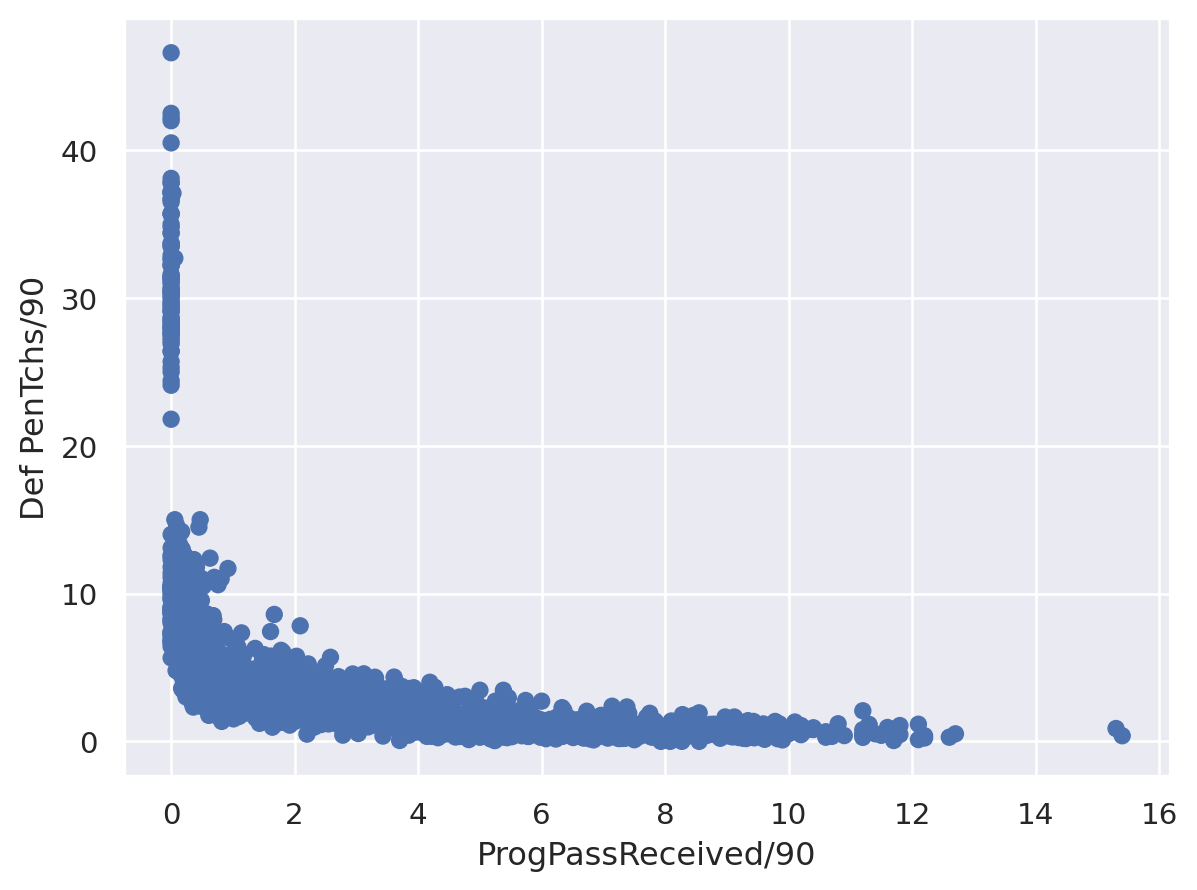

In [ ]:
(
    so.Plot(data_num, 'ProgPassReceived/90', 'Def PenTchs/90')
    .add(so.Dot())
)

Y acá puede llegar a verse que el cluster más separado (abajo a la izquierda) tenga que ver con la columna de puntos con cero pases progresivos recibidos pero mayor cantidad de acciones defensivas dentro del área por 90 minutos. También parece ser una buena medida para distinguir defensores de delanteros, aunque deja un bloque muy grande de jugadores que no realizan una cantidad significativa de ninguno. Pero parece marcar una relación inversamente proporcional entre ambas características.

2c) Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por k-medias, y colorear los puntos según las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

Si bien parece claro que hay dos clusters bien definidos, vamos a realizar primero con 2 y luego probamos haciendo el test del codo (Elbow test) para determinar el número apropiado de clusters, restringiendonos a 8 clusters máximo.

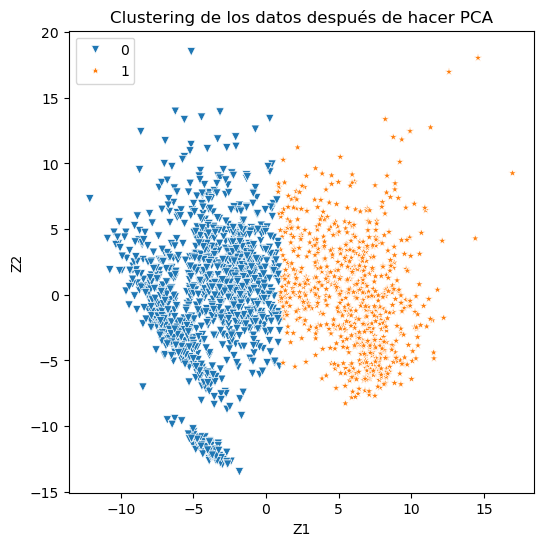

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10)#inicializo el model con 2 clusters
scaler = MinMaxScaler().set_output(transform='pandas')
data_escalado = scaler.fit_transform(stats_pca)#escalo las variables

etiquetas = kmeans.fit_predict(data_escalado)#etiqueto los distintos valores que tengo


plt.figure(figsize= (6,6))

formas = {
    0: 'v',
    1: '*',
}


sns.scatterplot( x=stats_pca[:,0],y= stats_pca[:,1], hue = etiquetas, style = etiquetas, markers=formas)
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('Clustering de los datos después de hacer PCA')
plt.show()

Vemos que no separa bien ni siquiera los dos clusters que se encuentran claramente delimitados. Ahora testeamos el error para distintos valores de K.

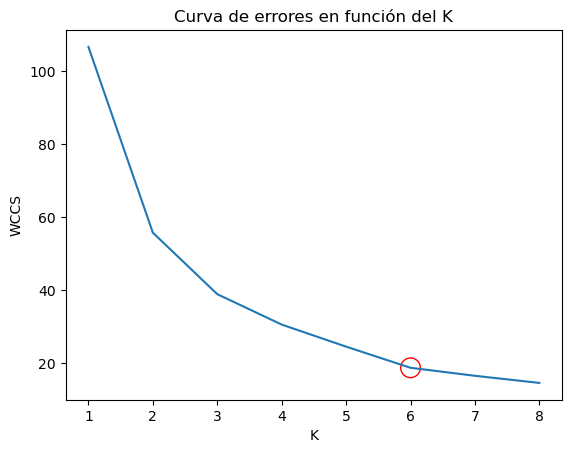

In [ ]:
wccs = []
escalado = data_escalado.copy()

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, n_init=10)
    clusters = kmeans.fit_predict(escalado)
    error = kmeans.inertia_
    wccs.append(error)


sns.lineplot(x = range(1,9),y = wccs)
plt.title('Curva de errores en función del K')
plt.scatter(6, wccs[5], color='red', marker='o', s=200, facecolors='none')
plt.xlabel('K')
plt.ylabel('WCCS')
plt.show()


Acá podemos ver que pareciera la cantidad óptima de clusters sería 6, pero claramente no hay seis clusters. Observando los gráficos y recordando que KMeans no funciona bien en datos que no sean isotrópicos o en presencia de outliers, no pareciera ser el mejor método de clustering para este conjunto de datos, ya que aún después de realizar PCA no logramos ninguno de esos dos requerimientos.

2d) Repetir el agrupamiento utilizando DBSCAN. ¿Cómo eligirían en este caso un valor de ε apropiado? Sugerencia: consultar la sección ”Selección del hiperparámetro eps” del Note- book de la clase de DBSCAN (o utilizar cualquier otra técnica que consideren apropiada)


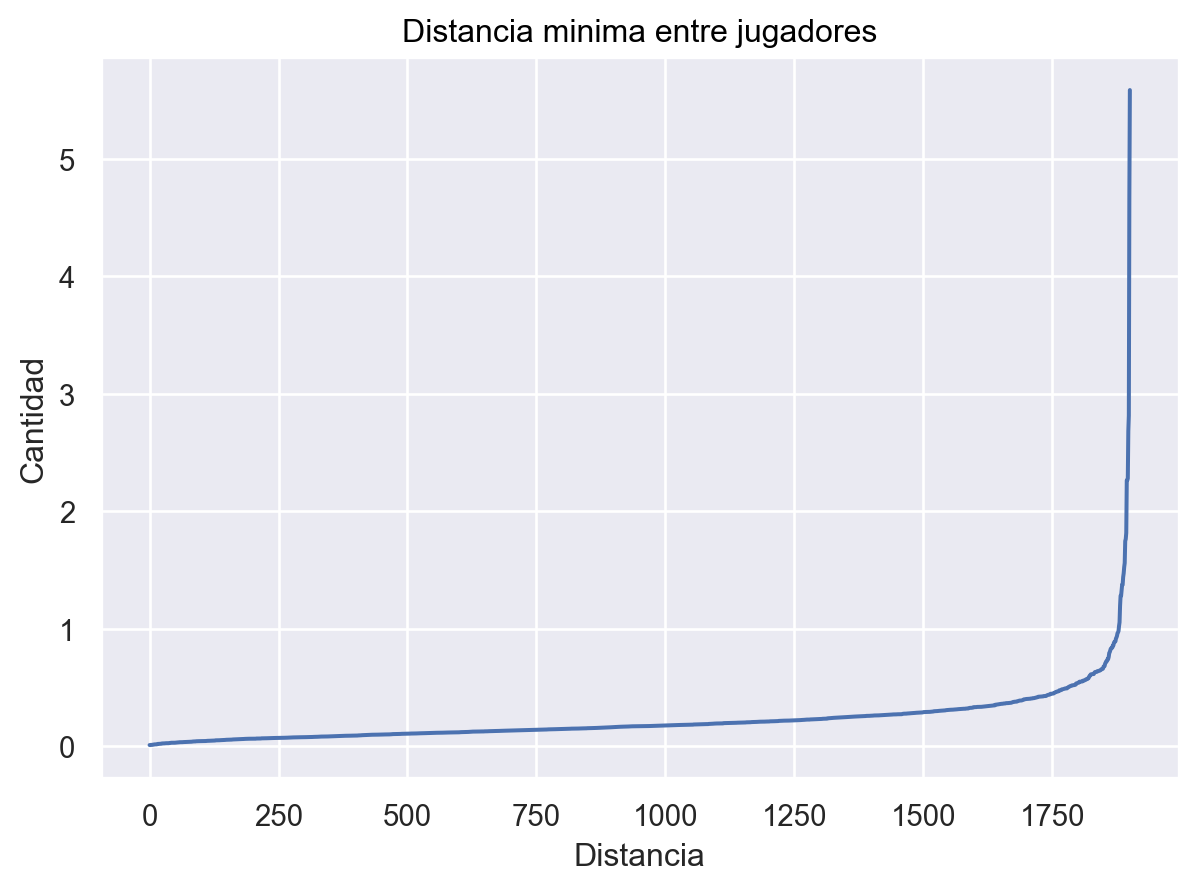

In [ ]:
pca_df = pd.DataFrame({"Z1": stats_pca[:,0],"Z2": stats_pca[:,1]})
neighbors = NearestNeighbors(n_neighbors=2)  #vemos la distancia de cada jugador al más cercano
neighbors_fit = neighbors.fit(pca_df)

# Ordenamos de menor a mayor las distancias y graficamos
distancias, indices = neighbors_fit.kneighbors(pca_df)
distancias = distancias[:,1]
distancias = np.sort(distancias, axis=0)

(so.Plot(x = np.arange(len(distancias)), y = distancias)
    .add(so.Line())
    ).label(title='Distancia minima entre jugadores',y = 'Cantidad', x='Distancia')

#graficamos las distancias de cada uno

Se ve que el quiebre de la curva es alrededor de y = 0,8, lo utilizamos como epsilon


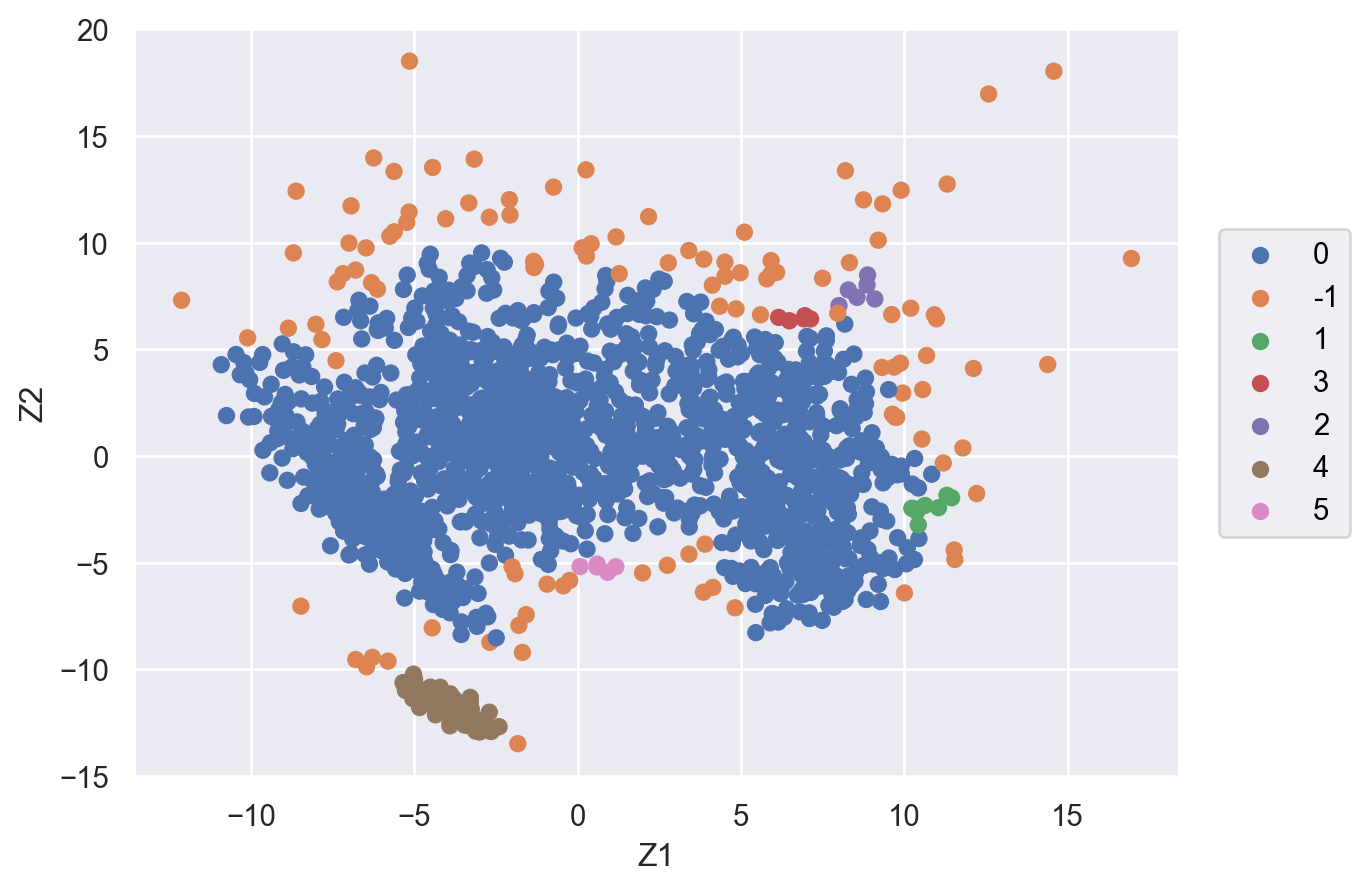

In [ ]:

clustering = DBSCAN(eps=0.8,min_samples=5)
labels = clustering.fit_predict(pca_df)
(
    so.Plot(x=pca_df["Z1"],y=pca_df["Z2"],color=labels.astype('str'))
    .add(so.Dot())
)

2e) Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos componentes principales, modificando los valores de epsilon y minPts convenientemente. ¿Con cuál de las dos opciones obtienen mejores resultados?

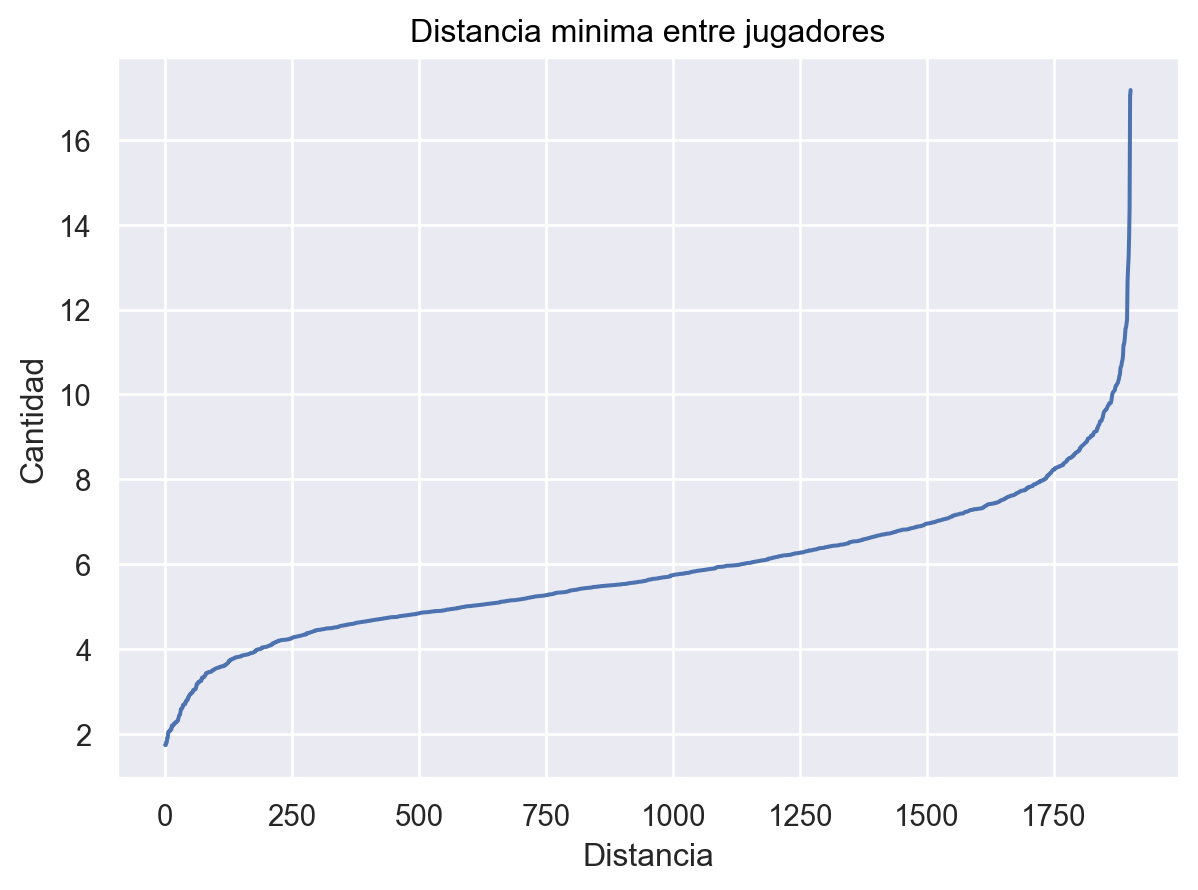

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_num_star)

distances, indices = neighbors_fit.kneighbors(data_num_star)#emos las distancias nuevamente, pero con los datos originales, sin hace reducción con PCA
distances = distances[:,1]
distances = np.sort(distances, axis=0)#ordenamos de menor a mayor

plt = so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())
plt.label(title='Distancia minima entre jugadores',y = 'Cantidad', x='Distancia')

#graficamos los resultados de las distancias

Observando el gráfico podemos determinar que tomando epsilon entre 9 y 10 se puede realizar el agrupamiento que esperamos obtener.

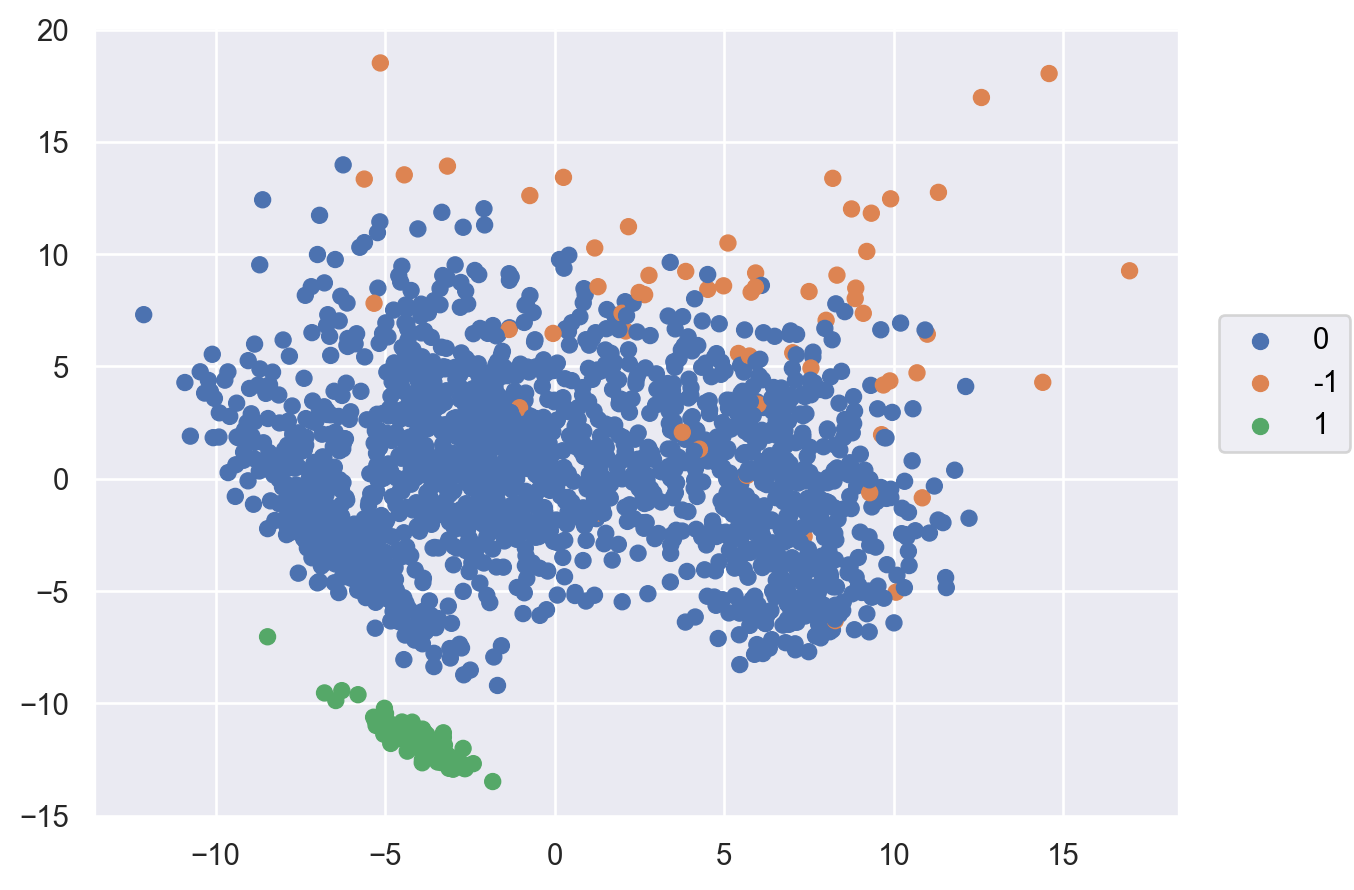

In [ ]:
clustering = DBSCAN(eps=9.7,min_samples=50)
labels = clustering.fit_predict(data_num_star)
(
    so.Plot(x=stats_pca[0:,0],y=stats_pca[0:,1],color=labels.astype('str'))
    .add(so.Dot())
)

Gráficamente podemos visualizar que se obtienen mejores resultados al realizar el agrupamiento utilizando todas las variables
originales en vez de solo las dos componentes principales.

#### 3.Clasificación

3a)Definir la variable Pos_filt que es la columna Pos, pero donde los jugadores deben tener una sola posición (pueden quedarse sólo con la primera posición de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren más conveniente).

In [ ]:
# Nos quedamos sólo con la primera posición de cada jugador
Pos_filt = frb["Pos"].apply(lambda x: x.split(',')[0]) # Primero separamos cada posición (usamos
# La coma como referencia) y nos quedamos con la primera posición

3b) Construir el DataFrame data_clasif que resulta de agregarle la columna de Pos_filt al DataFrame data_num. Dividir data_num en un 80% para entrenamiento y un 20% para testeo.

In [ ]:
# Asignamos "Pos_filt" a "data_clasif" para mayor claridad
data_clasif = Pos_filt

# Separamos data_num en 80% entrenamiento y 20% testeo
from sklearn.model_selection import train_test_split

# Los features son el data_num (variable "X") y la variable respuesta (variable "y") es data_clasif
X_train, X_test, y_train, y_test = train_test_split(data_num, data_clasif, test_size=0.2, random_state=30)

# Escalamos los datos de entrenamiento y testeo con MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

3c) Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de K. (Esto puede demorar mucho si prueban muchos valores de K, pueden hacerlo hasta un valor máximo de K = 20.) Sugerencia: puede resultar de ayuda KNeighborsClassifier de sklearn e investigar esa librería para aplicar esquemas de validación.

In [ ]:
posibles_k = {'n_neighbors': range(1, 21)}  # Prueba k de 1 a 20
knn = KNeighborsClassifier() # Inicializamos KNN para clasificar

# Utilizamos "GridSearchCV" de sklearn para obtener el mejor k

# Explicacion de los parametros explicitados:(Le digo que es un knn, le pasamos mi array de k a probar, cross validation de 20,
# metrica para evaluar el rendimiento, no mostrar la ejecución)

grid_search = GridSearchCV(estimator=knn, param_grid=posibles_k, cv=5, scoring='accuracy',verbose=0)
grid_search.fit(X_train, y_train)
mejor_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de k:", mejor_k)

Mejor valor de k: 11


3d) Para el valor de K obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?

In [ ]:
# Entrenamos el modelo utilizando el mejor k
knn = KNeighborsClassifier(n_neighbors= mejor_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión:", precision)


Presición: 0.910761154855643


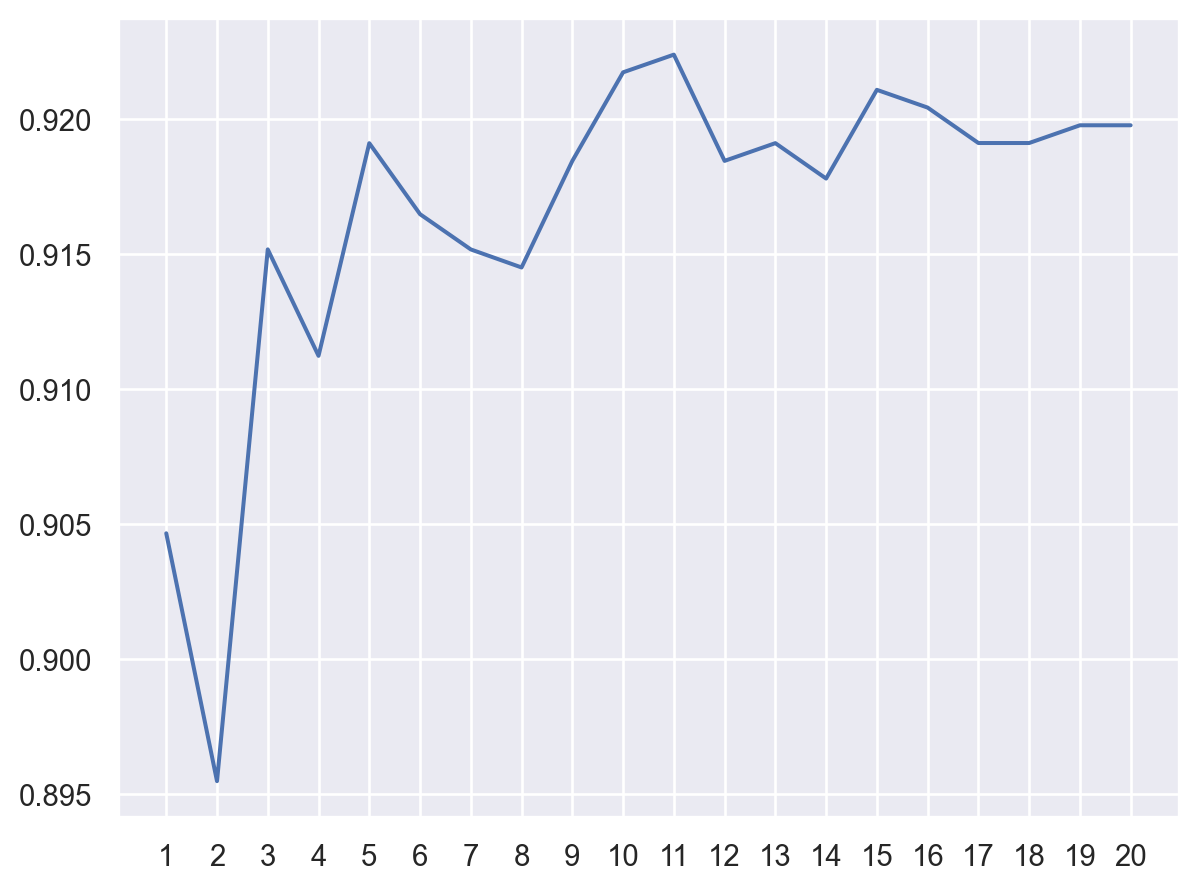

In [ ]:
# Graficamos
# Obtener los resultados de GridSearchCV
resultados = grid_search.cv_results_
k_values = posibles_k['n_neighbors']
mean_test_scores = resultados['mean_test_score']

# Graficamos los resultados de los k
pltk = (
    so.Plot(x=k_values, y=mean_test_scores).add(so.Line())
)
pltk.label(title= "Resultados de GridSearchCV para KNN", x="k", y="Presición")#le agregamos etiquetas a los ejes y título
pltk.scale(x=so.Continuous().tick(every=1))#hacemos que en el eje x sean numeros enteros los ticks


Se puede ver que efectivamente el mejor k es 11 (al menos hasta el límite k = 20).

k = 1: Precisión = 0.8845
k = 2: Precisión = 0.8871
k = 3: Precisión = 0.9003
k = 4: Precisión = 0.8976
k = 5: Precisión = 0.8924
k = 6: Precisión = 0.8898
k = 7: Precisión = 0.8976
k = 8: Precisión = 0.8950
k = 9: Precisión = 0.9055
k = 10: Precisión = 0.9003
k = 11: Precisión = 0.9108
k = 12: Precisión = 0.9029
k = 13: Precisión = 0.9108
k = 14: Precisión = 0.9029
k = 15: Precisión = 0.9029
k = 16: Precisión = 0.8924


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


k = 17: Precisión = 0.9029
k = 18: Precisión = 0.9029
k = 19: Precisión = 0.9108


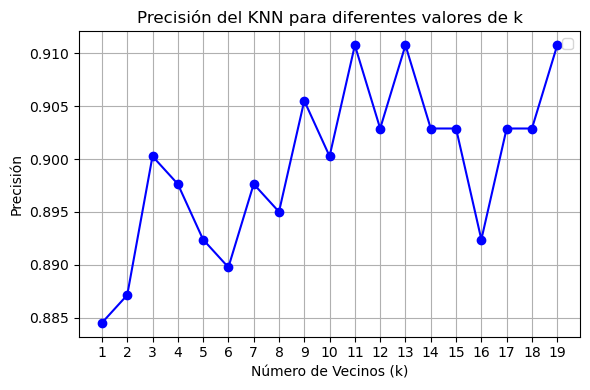

In [ ]:
# Cambiamos el método de evaluación de k (iteración) para tener una segunda confirmación
# Crear una lista para almacenar los resultados
k_values = list(range(1, 20, 1))
accuracies = []

# Iterar sobre los diferentes valores de k
for K in k_values:
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train, y_train)
    y_pred = neighbor.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {K}: Precisión = {acc:.4f}")

# Graficar los resultados
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Precisión del KNN para diferentes valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Efectivamente k = 11 es el mejor (al menos hasta un máximo de k = 20)

7e) Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.

In [ ]:
# Aplicar PCA para reducir a dos componentes principales
pca = PCA(n_components=2)
# Array donde cada fila representa una observación transformada en el espacio de las componentes principales, y cada columna una componente principal diferente
componentes_principales = pca.fit_transform(data_num)

# Crear un nuevo DataFrame con las dos componentes principales y la variable objetivo
data_num_pca = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])

# Verificar la varianza explicada por las dos componentes principales
print(f'Varianza explicada por PC1 y PC2: {sum(pca.explained_variance_ratio_)}')

Varianza explicada por PC1 y PC2: 0.9693578638647986


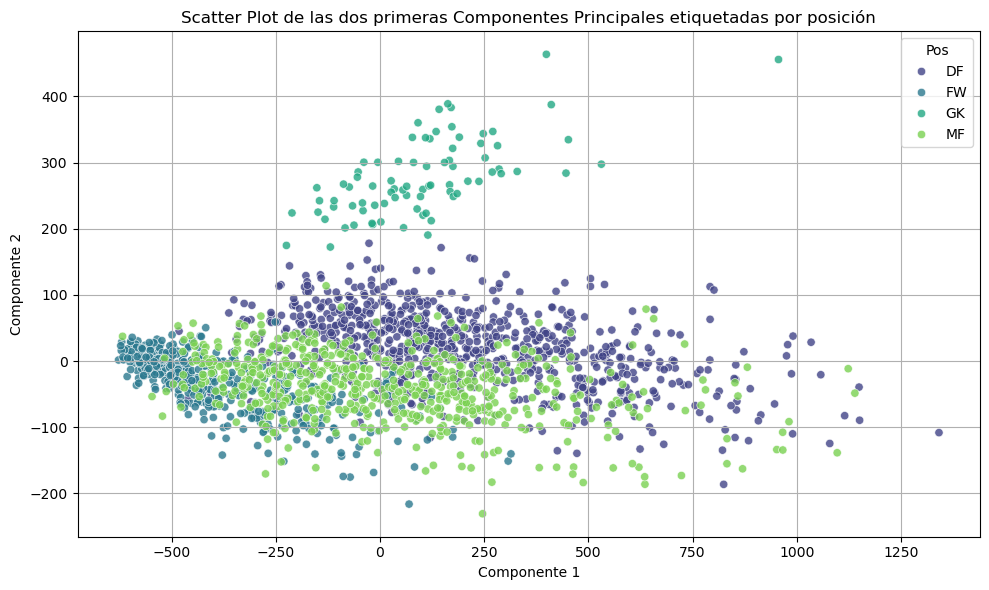

In [ ]:
# Graficamos de la cantidad de observaciones usando dos componentes principales
data_num_pca = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])
data_num_pca['Pos'] = data_clasif  # Agrega las etiquetas de Pos

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_num_pca, x='Componente 1', y='Componente 2', hue='Pos', palette='viridis', alpha=0.8)
plt.title('Scatter Plot de las dos primeras Componentes Principales etiquetadas por posición')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.tight_layout()
plt.show()

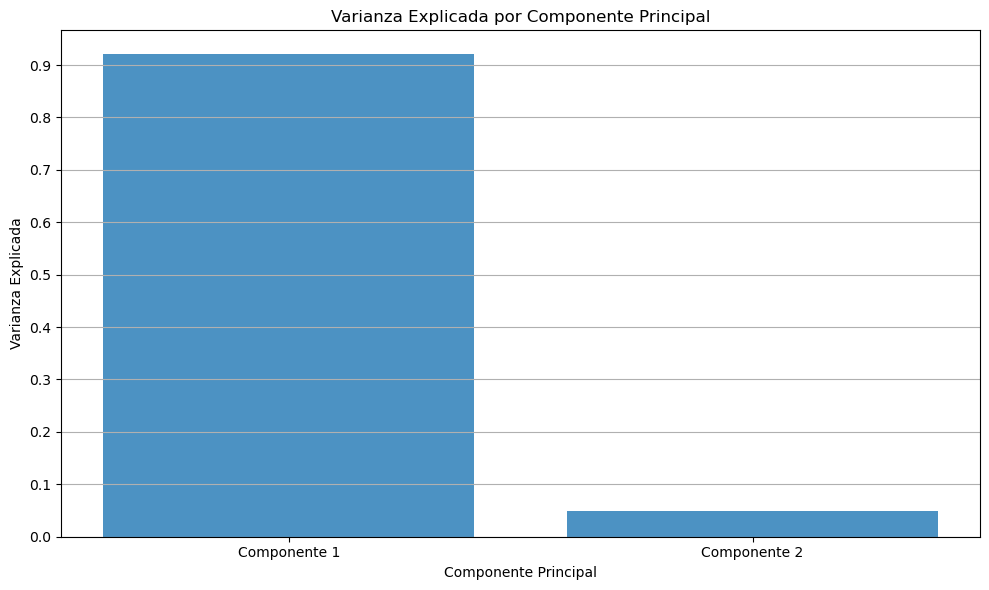

Varianza explicada de la primera componente: 0.9202251754667414
Varianza explicada de la segunda componente: 0.0491326883980572


In [ ]:
# Grafico de la varianza explicada por la primera (barra izquierda) y segunda (barra de la derecha) componente
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.8)

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1), ['Componente 1', 'Componente 2'])
plt.yticks(np.arange(0, 1,step = 0.1))
ax = plt.gca()
ax.grid(axis='x', linestyle='', color='gray', alpha=0.7, which='both')


plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'Varianza explicada de la primera componente: {(pca.explained_variance_ratio_[0])}')
print(f'Varianza explicada de la segunda componente: {(pca.explained_variance_ratio_[1])}')

Mejor valor de k: 20
Precisión: 0.7427821522309711


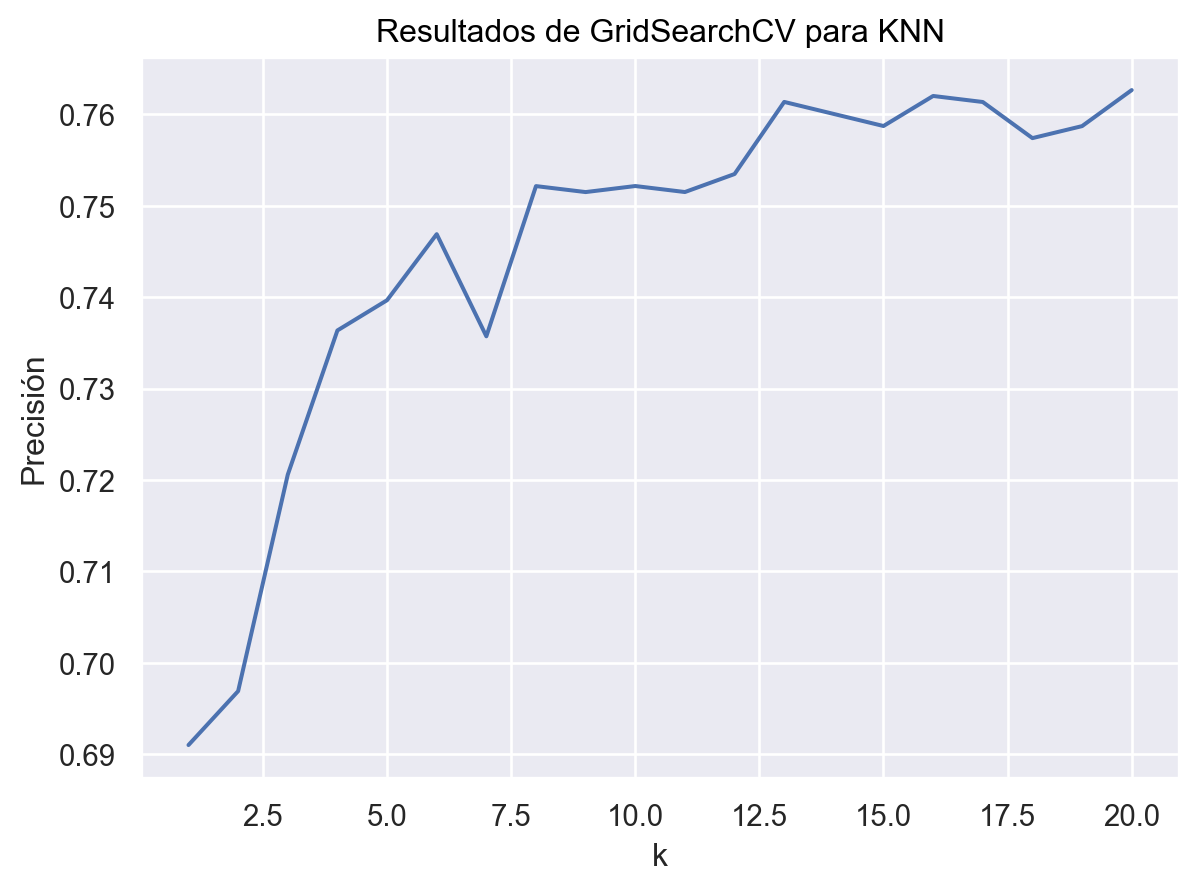

In [ ]:
# Repetimos todo el proceso utilizando sólo 2 componentes principales
# Borramos la columna "Pos" para poder escalar
data_num_pca = data_num_pca.drop("Pos", axis = 1)

# Separamos data_num en 80% entrenamiento y 20% testeo
# Los features son el "data_num_pca" (mi variable "X") y la variable respuesta (variable "y") es "data_clasif"

X_train, X_test, y_train, y_test = train_test_split(data_num_pca, data_clasif, test_size=0.2, random_state=30)

# Escalamos los datos de entrenamiento y testeo con MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

posibles_k_pca = {'n_neighbors': range(1, 21)}  # Prueba k de 1 a 20
knn = KNeighborsClassifier() # Inicializamos KNN para clasificar

# Utilizamos "GridSearchCV" de sklearn para obtener el mejor k

# Explicacion parametros:(Le decimos que es un knn, le pasamos el array de k a probar, cross validation de 20, metrica para evaluar el rendimiento, mostrar la ejecución)

grid_search = GridSearchCV(estimator=knn, param_grid=posibles_k, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)
mejor_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de k:", mejor_k)

# Entrenamos el modelo utilizando el mejor k
knn = KNeighborsClassifier(n_neighbors= mejor_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión:", precision)

# Obtenemos los resultados de GridSearchCV
resultados = grid_search.cv_results_
k_values_pca = posibles_k_pca['n_neighbors']
mean_test_scores_pca = resultados['mean_test_score']

# Graficamos los resultados de los k

so.Plot(x=k_values_pca, y=mean_test_scores_pca).add(so.Line()).label(title= "Resultados de GridSearchCV para KNN", x="k", y="Precisión")


La precisión pasó de 0.91 a 0.74 utilizando 2 componentes, claramente empeoró.

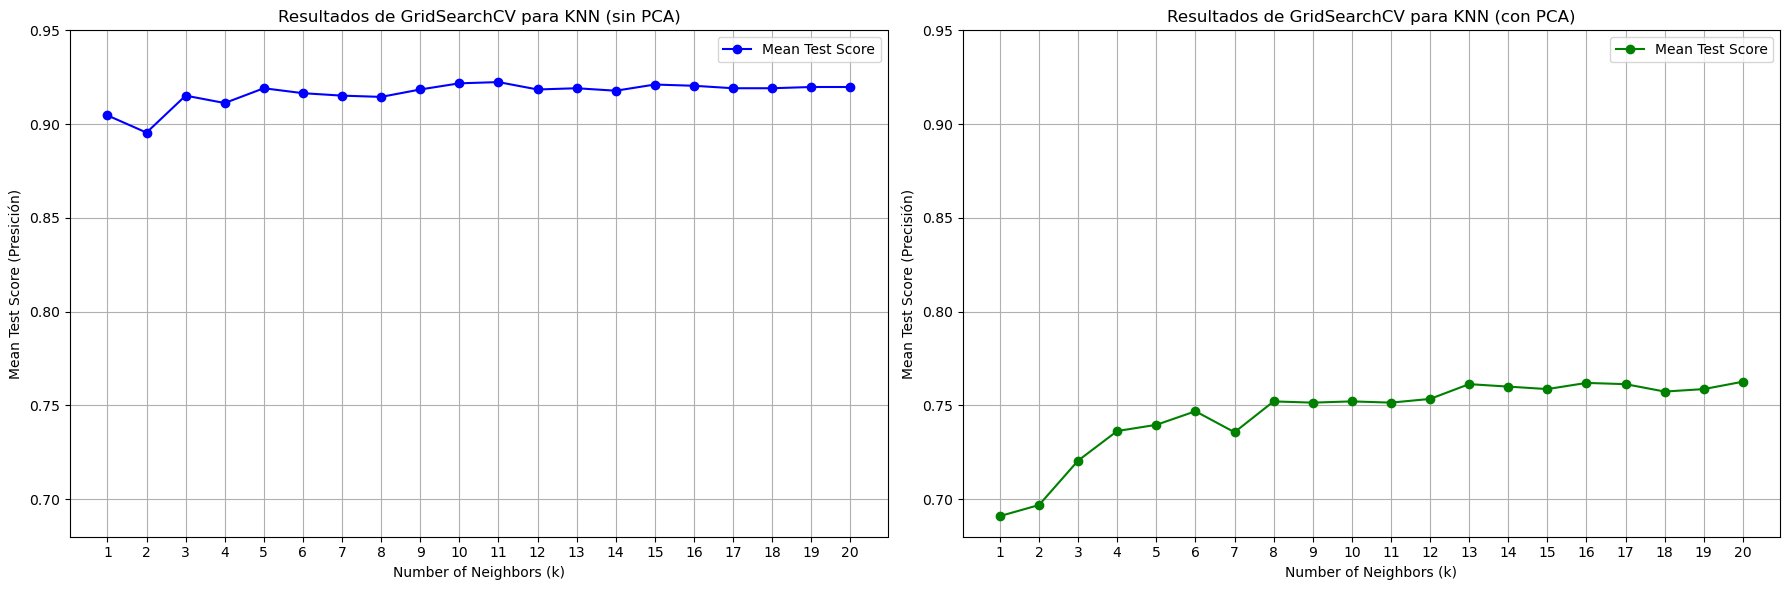

In [ ]:
# Grafico de comparación con y sin PCA de los resultados de los k
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

y_max = 0.95
y_min = 0.68
# Resultados sin PCA
ax[0].plot(posibles_k['n_neighbors'], mean_test_scores, marker='o', linestyle='-', color='b', label='Mean Test Score')
ax[0].set_title('Resultados de GridSearchCV para KNN (sin PCA)')
ax[0].set_xlabel('Number of Neighbors (k)')
ax[0].set_ylim(y_min,y_max)
ax[0].set_ylabel('Mean Test Score (Presición)')
ax[0].set_xticks(posibles_k['n_neighbors'])
ax[0].grid(True)
ax[0].legend()

# Resultados con PCA
ax[1].plot(posibles_k_pca['n_neighbors'], mean_test_scores_pca, marker='o', linestyle='-', color='g', label='Mean Test Score')
ax[1].set_title('Resultados de GridSearchCV para KNN (con PCA)')
ax[1].set_xlabel('Number of Neighbors (k)')
ax[1].set_ylim(y_min,y_max)
ax[1].set_ylabel('Mean Test Score (Precisión)')
ax[1].set_xticks(posibles_k_pca['n_neighbors'])
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

Acá se puede apreciar la diferencia en las precisiones con y sin PCA (casi un 20%)

8) Repetir el mismo método de clasificación con el dataset de jugadoras de la liga inglesa femenina superleague2023.csv. Para esto, quedarse con la columna Pos y las columnas a partir de MP, inclusive. ¿Qué porcentaje de aciertos obtienen en este caso? ¿Puede modificarse el parámetro para obtener un porcentaje mayor?

In [ ]:
leagueWomen = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/superleague2023.csv') #Cargamos dataset "superleague2023"
# Replicamos todo lo que hicimos anteriormente

# Eliminamos las columnas que nos pide el enunciado
leagueWomen = leagueWomen.drop(['Rk', 'Player', 'Nation','Squad','Age','Born'], axis=1)

# Comprobamos que no haya datos faltantes
leagueWomen.isnull().all().any() # Da False, por lo tanto no hay datos faltantes

# Nos quedamos sólo con la primera posición de cada jugadora
data_clasif_women = leagueWomen['Pos'].apply(lambda x: x.split(',')[0])   # Primero separamos cada posición (usamos la coma como referente) y nos quedamos con la primera posición

# Eliminamos la variable respuesta de los features y nos quedamos con los valores numéricos
data_num = leagueWomen.select_dtypes(np.number).copy()  # copiamos las columnas de leagueWomen que tienen valores numéricos

# Separo data_num en 80% entrenamiento y 20% testeo
from sklearn.model_selection import train_test_split

# Los features son el data_num (variable "X") y la variable respuesta (variable "y") es data_clasif_women
X_train, X_test, y_train, y_test = train_test_split(data_num, data_clasif_women, test_size=0.2, random_state=30)

# Escalar los datos de entrenamiento y testeo con MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

posibles_k = {'n_neighbors': range(1, 31)}  # Prueba k de 1 a 20
knn = KNeighborsClassifier() # Inicializo KNN para clasificar

# Utilizamos "GridSearchCV" de sklearn para obtener el mejor k

# Explicacion parametros:(Le decimos que es un knn, le pasamos mi array de k a probar, cross validation de 20, metrica para evaluar el rendimiento, no mostrar la ejecución)
grid_search = GridSearchCV(estimator=knn, param_grid=posibles_k, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)
mejor_k = grid_search.best_params_['n_neighbors']
print("Mejor valor de k:", mejor_k)

# Entrenamos el modelo utilizando el mejor k
knn = KNeighborsClassifier(n_neighbors= mejor_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión:", precision)

# Obtenemos los resultados de GridSearchCV
resultados = grid_search.cv_results_
k_values = posibles_k['n_neighbors']
mean_test_scores = resultados['mean_test_score']

# Graficamos los resultados de los k
so.Plot(x=k_values, y=mean_test_scores).add(so.Line()).label(title= "Resultados de GridSearchCV para KNN", x="k", y="Precisión").scale(x=so.Continuous().tick(every=2))


Buscamos el por qué de tan baja precisión

In [ ]:
# Vemos las proporciones de las posiciones de los dos datasets
print("Porcentaje de posiciones en data_enum (FBRef2020-21.csv)\n",round(data_clasif.value_counts()/sum(data_clasif.value_counts())*100,1))
print("Porcentaje de posiciones en leagueWomen (superleague2023.csv) \n",round(data_clasif_women.value_counts()/sum(data_clasif_women.value_counts())*100,1))


Porcentaje de posiciones en data_enum
 Pos
DF    40.1
MF    31.7
FW    24.0
GK     4.3
Name: count, dtype: float64
Porcentaje de posiciones en leagueWomen 
 Pos
DF    32.9
MF    32.6
FW    25.3
GK     9.2
Name: count, dtype: float64


Hay una discrepancia entre la cantidad de jugadores en cada posición, esto puede hacer un sobreajuste a posiciones mayoritarias es por esto que la precisión resulta tan baja

k = 1: Precisión = 0.4426
k = 3: Precisión = 0.6066
k = 5: Precisión = 0.5574
k = 7: Precisión = 0.5902
k = 9: Precisión = 0.5902
k = 11: Precisión = 0.6066
k = 13: Precisión = 0.6066
k = 15: Precisión = 0.6393
k = 17: Precisión = 0.5410
k = 19: Precisión = 0.5082
k = 21: Precisión = 0.4918
k = 23: Precisión = 0.5082
k = 25: Precisión = 0.5082
k = 27: Precisión = 0.4918
k = 29: Precisión = 0.4918


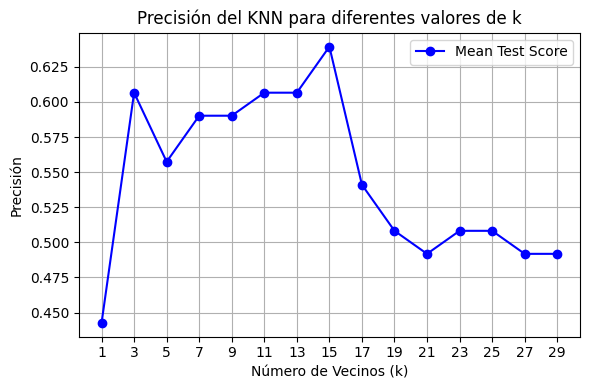

In [ ]:
# Cambiamos el método de evaluación de k
# Crear una lista para almacenar los resultados
k_values = list(range(1, 30, 2))
accuracies = []

# Iterar sobre los diferentes valores de k
for K in k_values:
    neighbor = KNeighborsClassifier(n_neighbors=K)
    neighbor.fit(X_train, y_train)
    y_pred = neighbor.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {K}: Precisión = {acc:.4f}")

# Graficar los resultados
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b' , label='Mean Test Score')
plt.title('Precisión del KNN para diferentes valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Con este método subimos de un 0.55 (utilizando validación cruzada de scikilearn) a un 0.63 (utilizando iteraciones en el modelo directamente)

In [ ]:
# Entrenamos el modelo utilizando el mejor k = 15
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
precision = accuracy_score(y_test, y_pred)
print("Precisión:", precision)

Precisión: 0.639344262295082


### 4) Redes neuronales

4a) En 2021 Messi fue transferido del Barcelona al PSG. Basándose en los datos disponibles,recomendarle a Barcelona un jugador de caracteristicas similares a Messi pero de menor valor.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/transfermarkt_fbref_201920.csv', delimiter=";") #Cargamos dataset "transfermarkt_fbref_201920"
data.isnull().sum() # Comprobamos si tiene datos NaN
data = data.dropna() # Eliminamos 417 filas con datos NaN
data.isnull().all().any() # Comprobamos que ya no tenga datos NaN
data_messi = data[data['player'] == 'Lionel Messi'] #Filtramos por Messi

# Seleccionamos solo las columnas numéricas
X = data.select_dtypes(include=[int, float])
player_names = data["player"] # Filtramos los nombres de los jugadores

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos K-means
kmeans = KMeans(n_clusters=2,n_init=10, random_state=42) # Le decimos 2 clusters y que ponga 10 centros al azar (se queda con el de menor inertia_)
kmeans.fit(X_scaled)

# Añadimos las etiquetas de los clusters al DataFrame original
data['cluster_label'] = kmeans.labels_

# Obtener el tamaño de cada cluster
cluster_sizes = data['cluster_label'].value_counts().sort_index()

# Imprimir el tamaño de cada cluster
for cluster_id in range(kmeans.n_clusters):
    print(f"Tamaño del cluster {cluster_id}: {cluster_sizes[cluster_id]}")


Tamaño del cluster 0: 159
Tamaño del cluster 1: 2058


Vemos que tenemos 2 clusters. Observamos ahora que Messi está en el cluster 1

In [ ]:
# Obtener el label del cluster al que pertenece Messi
messi_name = 'Lionel Messi'
messi_cluster_label = data.loc[data['player'] == messi_name, 'cluster_label'].values[0]

# Filtrar los jugadores que están en el mismo cluster que Messi
similar_players = data[data['cluster_label'] == messi_cluster_label]

# Mostrar los nombres de los jugadores en el mismo cluster
print(f"Jugadores similares a {messi_name} en el Cluster {messi_cluster_label}:")
similar_players['player']

Jugadores similares a Lionel Messi en el Cluster 1:


0       Martin Aguirregabiria
1                Oliver Burke
2            Ví­ctor Camarasa
3                Rubén Duarte
4                 Rodrigo Ely
                ...          
2226             Jan Bednarek
2227            Ryan Bertrand
2228           Sofiane Boufal
2229              Kevin Danso
2230           Moussa Djenepo
Name: player, Length: 2058, dtype: object

Vemos que hay 2057 jugadores en el mismo cluster que él

In [ ]:
# Calculamos de Distancia euclidiana media
from scipy.spatial.distance import cdist # Para calcular la distancia euclidiana media

# Filtrar las características numéricas

messi_cluster_features = X_scaled[data['cluster_label'] == messi_cluster_label]
other_clusters_features = X_scaled[data['cluster_label'] != messi_cluster_label]

# Calcular la distancia euclidiana media dentro del cluster de Messi
messi_distances = cdist(messi_cluster_features, [X_scaled[data['player'] == messi_name][0]])
mean_distance_messi_cluster = messi_distances.mean()

# Calcular la distancia euclidiana media a jugadores en otros clusters
other_distances = cdist(other_clusters_features, [X_scaled[data['player'] == messi_name][0]])
mean_distance_other_clusters = other_distances.mean()

print(f"Distancia euclidiana media dentro del cluster de Messi: {mean_distance_messi_cluster}")
print(f"Distancia euclidiana media a jugadores en el otro cluster: {mean_distance_other_clusters}")

Distancia euclidiana media dentro del cluster de Messi: 56.66875133359472
Distancia euclidiana media a jugadores en el otro cluster: 69.89276254948716


Vemos que en el cluster de Messi la EMD (Distancia Euclidiana Media) es menor por lo que sugiere que sus puntos están más cercanos a él (cluster más compacto), mientras que en el otro cluster están más dispersos. Esto tiene sentido y significa que vamos en buen camino

In [ ]:
# Otras métricas para corroborar la bondad de los clusters (WCSS y Silhouette Score)

# Calculamos WCSS
wcss = kmeans.inertia_

# Calculamos el Silhouette Score
from sklearn.metrics import silhouette_score # Para calcular el Silhouette Score
# El Silhouette Score varía entre -1 y 1:
#Un valor cercano a +1 indica que los puntos están bien agrupados y están lejos de otros grupos
#Un valor cercano a 0 indica que los puntos podrían estar en un límite entre dos grupos
#Un valor cercano a -1 indica que los puntos podrían haber sido asignados al grupo incorrecto
sil_score = silhouette_score(X_scaled, kmeans.labels_)

# Iteramos para ver cual es el mejor k utilizando el WCSS y el Silhouette Score como referencia
k_values = range(2, 6) # Rango de k a probar
wcss_scores = [] # Array vacio para guardar los WCSS
silhouette_scores = [] # Array vacio para guardar los Silhouette Scores

# Iteramos sobre diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(X_scaled)

    # Calcular WCSS y silhouette score
    wcss = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, kmeans.labels_)

    # Guardar los resultados
    wcss_scores.append(wcss)
    silhouette_scores.append(sil_score)

    # Imprimir resultados de cada iteración
    print(f"k={k}: WCSS={wcss}, Silhouette Score={sil_score}")


k=2: WCSS=756492.0789096629, Silhouette Score=0.4503046119090017
k=3: WCSS=677016.838452216, Silhouette Score=0.4531610536977131
k=4: WCSS=597779.0383790459, Silhouette Score=0.1664112234280164
k=5: WCSS=564711.705391407, Silhouette Score=0.15084895989755806


Vemos que el mejor k según el WCSS es k=5, sin embargo según el Silhouette Score es k = 3. Por lo tanto concluímos que el mejor k que está en equilibrio entre esas dos métricas es k = 3

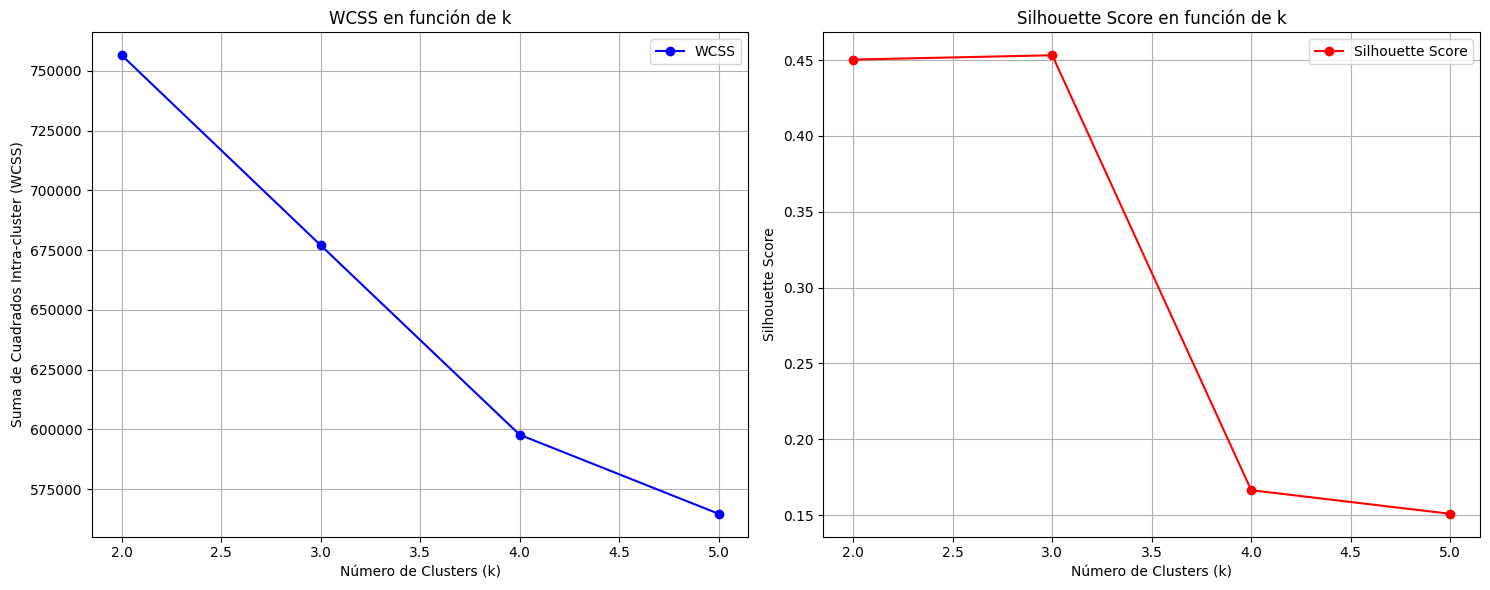

In [ ]:
# Graficamos WCSS y Silhouette en función de k
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graficamos WCSS en función de k
ax1.plot(k_values, wcss_scores, marker='o', linestyle='-', color='b', label='WCSS')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Cuadrados Intra-cluster (WCSS)')
ax1.set_title('WCSS en función de k')
ax1.grid(True)
ax1.legend()

# Graficamos Silhouette Score en función de k
ax2.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='r', label='Silhouette Score')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score en función de k')
ax2.grid(True)
ax2.legend()

# Ajustamos espacios entre subplots
plt.tight_layout()

# Mostramos la figura
plt.show()

Se ve claramente que el número óptimo de k es 3.

In [ ]:
# Seleccionamos el mejor valor de k
best_k = 3

# Inicializamos KMeans con múltiples inicializaciones
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)

# Ajustamos KMeans a los datos escalados
kmeans.fit(X_scaled)

# Obtenemos las etiquetas de los clusters y calculamos el WCSS y el Silhouette Score
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
wcss = kmeans.inertia_
print(f"WCSS para k={best_k}: {wcss}")
print(f"Silhouette Score para k={best_k}: {silhouette_avg}")

WCSS para k=3: 677016.838452216
Silhouette Score para k=3: 0.4531610536977131


Concluímos como un primer vistazo y "medida de seguridad" que los jugadores del cluster 0 (en donde está Messi) aparecen en el KNN que vamos a calcular a continuación.

In [ ]:
# Calculamos a los jugadores más cercanos (características similares) a Messi mediante KNN

# Obtenemos las características de Messi
messi_features = X_scaled[data['player'] == messi_name]

# Inicializamos NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20)
neighbors.fit(X_scaled)

# Encontramos los índices y distancias de los jugadores más cercanos a Messi
distances, indices = neighbors.kneighbors(messi_features)

# Mostramos los nombres de los jugadores más cercanos a Messi
jugadores_cercanos = data.iloc[indices[0]]['player'].values

print(f"Jugadores más cercanos a {messi_name}:")
print(jugadores_cercanos)

Jugadores más cercanos a Lionel Messi:
['Lionel Messi' 'Kevin De Bruyne' 'Ángel Di Marí\xada' 'Paulo Dybala'
 'Riyad Mahrez' 'Jadon Sancho' 'Neymar' 'Papu Gómez' 'Luis Alberto'
 'Domenico Berardi' 'Mohamed Salah' 'Marcus Rashford' 'Josip Ilicic'
 'Hakan í‡alhanoÄźlu' 'Timo Werner' 'Cristiano Ronaldo' 'Dejan Kulusevski'
 'Lorenzo Insigne' 'Willian' 'David Silva']


In [ ]:
# Obtenemos el valor de Messi
messi_valor = data.loc[data['player'] == messi_name]['value'].values[0]

# Obtenemos los valores de los jugadores más cercanos a Messi
jugadores_cercanos_valor = data.loc[data['player'].isin(jugadores_cercanos), 'value'].values

# Comparar los valores de los jugadores más cercanos con el valor de Messi
jugadores_cercanos_valor = jugadores_cercanos[jugadores_cercanos_valor < messi_valor]

# Mostramos los jugadores más cercanos a Messi pero más baratos
print(f"Jugadores similares a {messi_name} pero más baratos:")
print(jugadores_cercanos_valor)

Jugadores similares a Lionel Messi pero más baratos:
['Lionel Messi' 'Kevin De Bruyne' 'Paulo Dybala' 'Jadon Sancho' 'Neymar'
 'Papu Gómez' 'Mohamed Salah' 'Marcus Rashford' 'Josip Ilicic'
 'Hakan í‡alhanoÄźlu' 'Timo Werner' 'Cristiano Ronaldo' 'Lorenzo Insigne'
 'Willian' 'David Silva']


Finalmente obtenemos lo que queríamos, los jugadores con características similares a Messi pero más baratos que él

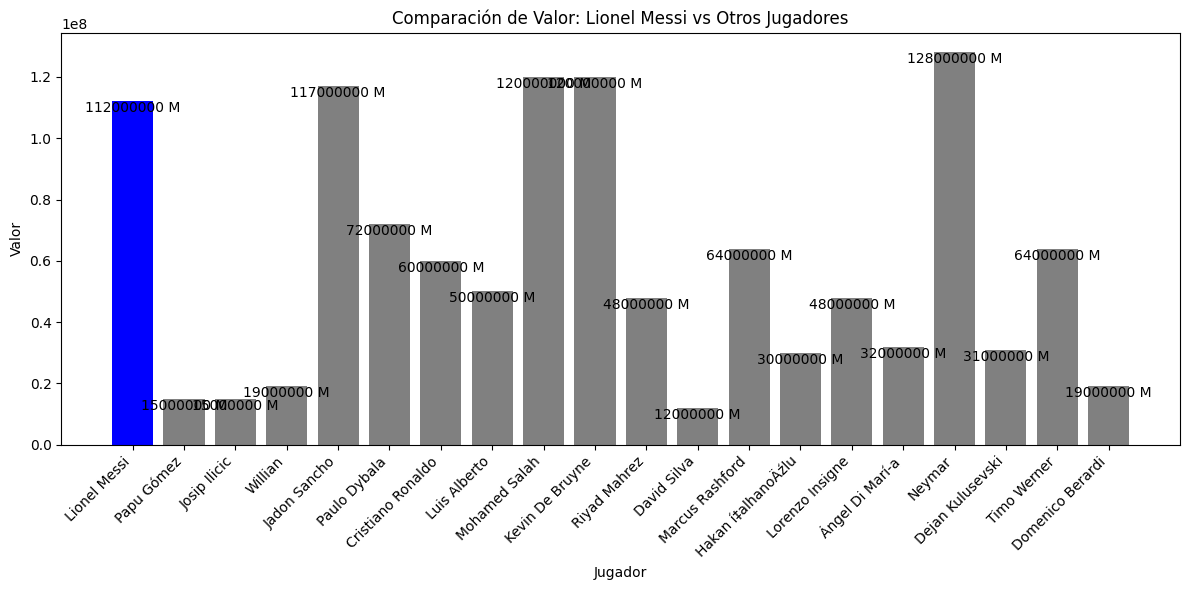

In [ ]:
# Graficamos el valor de los 19 jugadores más cercanos a Messi
data_mas_cercanos_grf = data.loc[data['player'].isin(jugadores_cercanos)] # DataFrame con los 19 jugadores más cercanos a Messi
# Obtenemos el valor de Messi
messi_value = data_mas_cercanos_grf.loc[data_mas_cercanos_grf['player'] == messi_name, 'value'].values[0]

# Obtenemos los valores de todos los jugadores, excluyendo a Messi
otros_jugadores = data_mas_cercanos_grf.loc[data_mas_cercanos_grf['player'] != messi_name, ['player', 'value']]

# Creamos una lista con los valores y nombres de los jugadores
valores = [messi_value] + list(otros_jugadores['value'])
nombres_jugadores = [messi_name] + list(otros_jugadores['player'])

# Colores para Messi y para los otros jugadores
colores = ['blue'] + ['grey'] * len(otros_jugadores)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(nombres_jugadores, valores, color=colores)

# Personalizamos el gráfico
plt.xlabel('Jugador')
plt.ylabel('Valor')
plt.title(f'Comparación de Valor: {messi_name} vs Otros Jugadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Agregamos etiquetas con los valores
for bar, valor in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{valor} M', ha='center', va='top')
# Mostramos el gráfico
plt.show()

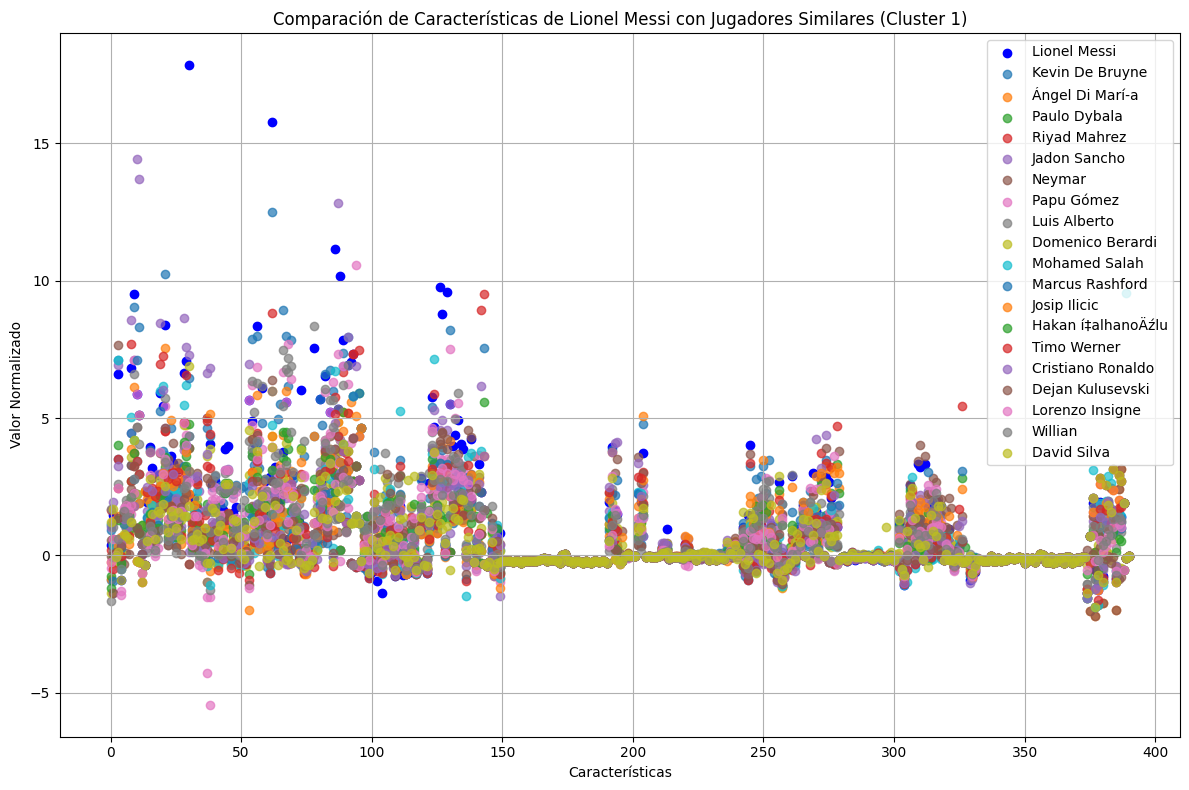

In [ ]:
# Graficar las características de Messi y los jugadores más cercanos a él
plt.figure(figsize=(12, 8))

# Graficar las características de Messi
plt.scatter(range(len(messi_features.flatten())), messi_features.flatten(), color='blue', marker='o', label=messi_name)

# Graficar las características de los jugadores más cercanos a Messi
for idx, player_name in zip(indices.flatten()[1:], jugadores_cercanos[1:]):  # Empezamos desde 1 para evitar a Messi
    player_features = X_scaled[idx]
    plt.scatter(range(len(player_features)), player_features, alpha=0.7, label=player_name)

plt.title(f'Comparación de Características de {messi_name} con Jugadores Similares (Cluster {messi_cluster_label})')
plt.xlabel('Características')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Vemos que hay demasiado ruido y no se puede apreciar bien. Tratamos de reducir ese ruido con PCA.

Varianza explicada por la Componente Principal 1: 15.96%
Varianza explicada por la Componente Principal 2: 12.19%

Características que más contribuyen a la Componente Principal 1:
pressure_regains      0.096595
pressures             0.095279
progressive_passes    0.094911
touches_att_3rd       0.094907
sca_passes_live       0.094174
Name: PC1, dtype: float64

Características que más contribuyen a la Componente Principal 2:
passes_progressive_distance    0.128173
passes_long                    0.126987
passes_high                    0.123887
minutes                        0.118946
games_starts                   0.118157
Name: PC2, dtype: float64


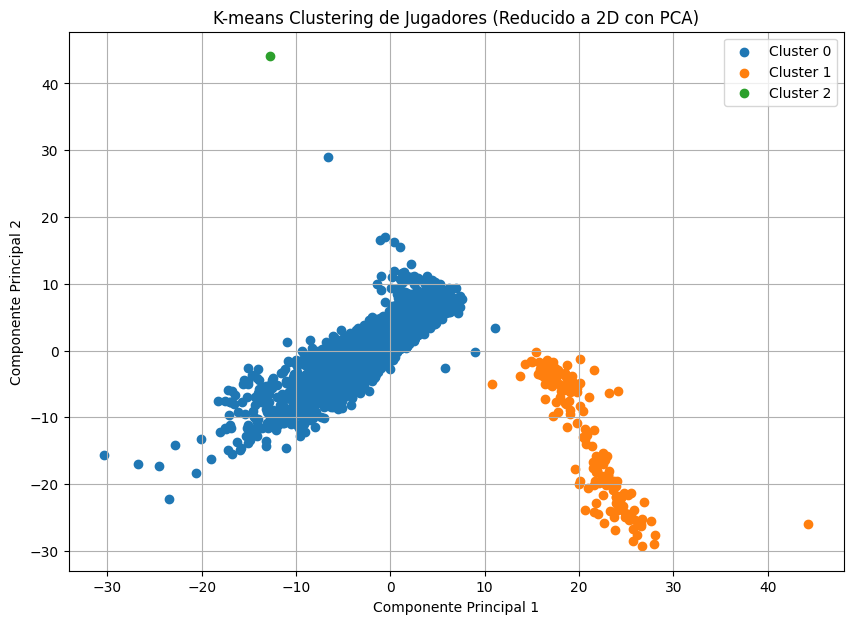

In [ ]:
# Vemos si podemos eliminar el ruido del gráfico usando dos componentes principales
# Reducción de dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtenemos el porcentaje de variabilidad explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por la Componente Principal 1: {explained_variance[0] * 100:.2f}%")
print(f"Varianza explicada por la Componente Principal 2: {explained_variance[1] * 100:.2f}%")

# Obtenemos los coeficientes de las componentes principales
components = pca.components_

# Creamos un DataFrame para los coeficientes de las componentes principales
component_df = pd.DataFrame(components, columns=X.columns, index=['PC1', 'PC2'])

# Mostramos las características que más contribuyen a cada componente principal
top_n = 5  # Número de características principales a mostrar

print("\nCaracterísticas que más contribuyen a la Componente Principal 1:")
print(component_df.loc['PC1'].abs().sort_values(ascending=False).head(top_n))

print("\nCaracterísticas que más contribuyen a la Componente Principal 2:")
print(component_df.loc['PC2'].abs().sort_values(ascending=False).head(top_n))

# Creamos un DataFrame para las componentes principales
data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
data_pca['cluster_label'] = kmeans.labels_
data_pca['player_name'] = player_names.values

# Graficamos los clusters
plt.figure(figsize=(10, 7))
for cluster in range(kmeans.n_clusters):
    cluster_data = data_pca[data_pca['cluster_label'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-means Clustering de Jugadores (Reducido a 2D con PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

Vemos que con las primeras 2 componentes principales a lo mucho explicamos el 28% de los datos (demasiado poco) y que las presiones o los pases largos son de las características más representativas.

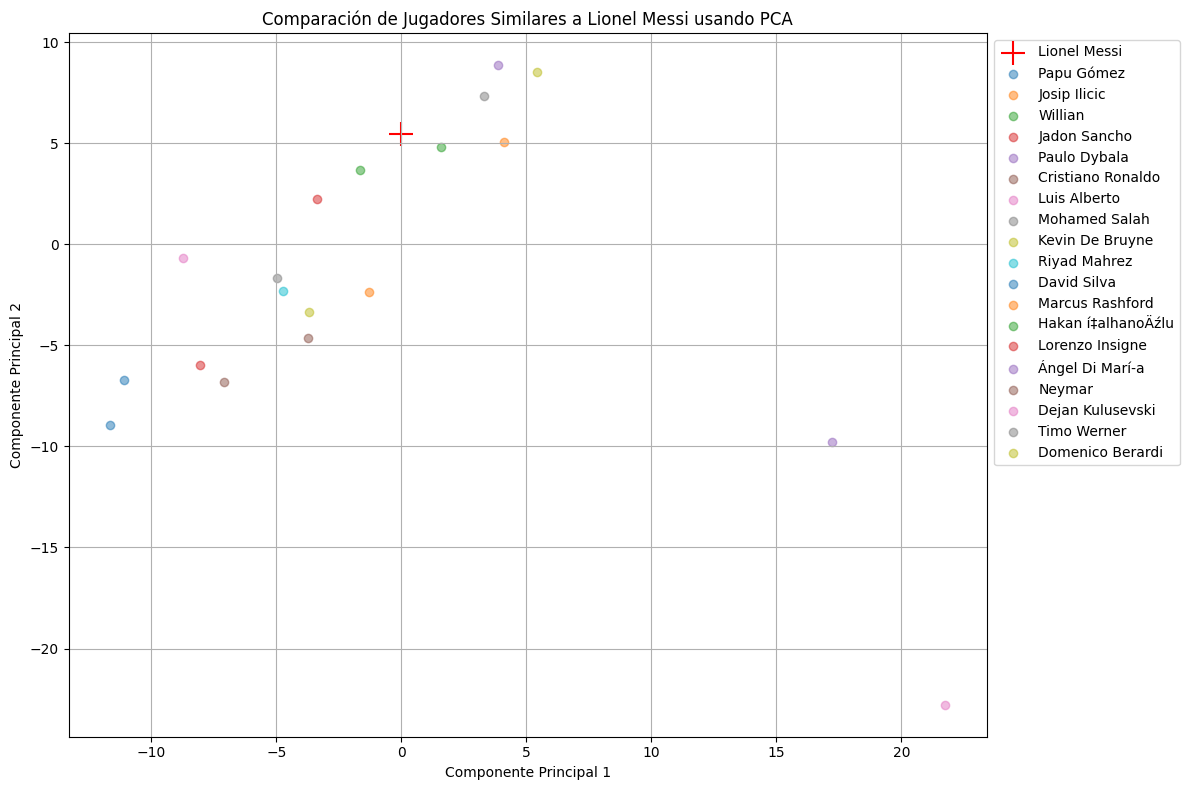

In [ ]:
# Volvemos a graficar pero ahora con PCA con 2 componentes principales
# Filtrar los datos de estos jugadores en el espacio reducido con PCA
jugadores_cercanos_indices = data[data['player'].isin(jugadores_cercanos)].index
jugadores_cercanos_indices = jugadores_cercanos_indices[jugadores_cercanos_indices != data[data['player'] == messi_name].index[0]]  # Eliminar a Messi
X_pca_nearest = X_pca[jugadores_cercanos_indices]

# Obtener las coordenadas de Messi en el espacio reducido
messi_index = data[data['player'] == messi_name].index[0]
messi_pca = X_pca[messi_index]

# Graficar a Messi y los jugadores más cercanos en el espacio de PCA
plt.figure(figsize=(8, 8))

# Graficar a Messi
plt.scatter(messi_pca[0], messi_pca[1], color='red', marker='+', label=messi_name, s = 300)

# Graficar los jugadores más cercanos a Messi
for idx in jugadores_cercanos_indices:
    player_pca = X_pca[idx]
    player_name = data.loc[idx, 'player']
    plt.scatter(player_pca[0], player_pca[1], alpha=0.5, label=player_name)

plt.title(f'Comparación de Jugadores Similares a {messi_name} usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Debido a la poca varianza se perdieron varios de los jugadores cercanos a Messi.

9b) Queremos elaborar un modelo para detectar jugadores “baratos”, es decir cuya valuaci ́on en el mercado (columna value) sea inferior a que la que nosotros estimemos. Para esto, quisiéramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuación pueden incorporar la edad entre las variables explicativas). El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.

In [ ]:
# Utilizamos regresión mediante redes neuronales
from google.colab import drive
drive.mount('/content/drive')
dataset_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/transfermarkt_fbref_201920.csv', delimiter=";") #Cargo dataset "transfermarkt_fbref_201920"

data = dataset_original.dropna(inplace=True) # Eliminamos datos faltantes

# nos quedamos con las variables numéricas
data = dataset_original.select_dtypes(include=[int, float])

# Creamos las features y variable respuesta
X = data.drop(['value'], axis=1)
y = data['value']

# Separamos data_num en 80% entrenamiento y 20% testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos de entrenamiento y testeo con MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

keras.utils.set_random_seed(33)  # Establecer la semilla aleatoria para que los resultados sean reproducibles

# Creamos el modelo
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))  # Capa de salida para regresión

# Usamos como optimizador a "Adam" (Adaptive Moment Estimation)
# Adam adapta la tasa de aprendizaje de cada parámetro individualmente en función de su estimación del momento y de la magnitud del gradiente
optimizer = keras.optimizers.Adam(learning_rate=0.85)

# Definimos r2_score con tensor flow para ver la bondad de nuestro modelo
def r2_score(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

# Compilamos el modelo
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=(r2_score)) #Le agrego el r2

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=0)

# Evaluar el modelo en el conjunto de testeo
results = model.evaluate(X_test, y_test, verbose=0, batch_size=len(y_test), return_dict=True)
print(results)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'loss': 98797703135232.0, 'r2_score': 0.654071033000946}


Nota: probamos con agregar variables dummies de las características: "position", "position2", "squad", "foot", "nacionality" y "league" pero empeoraban el r2. Por eso prescindimos de ellas.

Ahora para crear una función que clasifique si un jugador es barato o acorde usamos KNN. Para eso vamos a calcular la diferencia entre el valor real y el valor predicho por nuestro modelo de regresión. Si la diferencia es menor que 0, el jugador es "barato"

In [ ]:
# Predicciones del modelo de regresión
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular la diferencia entre el valor real y el valor predicho
train_diff = y_train - y_train_pred.flatten()
test_diff = y_test - y_test_pred.flatten()

# Crear columnas 'barato' basadas en la diferencia calculada
# Si la diferencia es menor que 0, el jugador es "barato"
umbral_train = train_diff < 0
umbral_test = test_diff < 0

# Modelo de clasificación para determinar si un jugador es "barato" o "no barato"
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, umbral_train)

# Predecir en el conjunto de prueba
test_barato_pred = knn_classifier.predict(X_test)

# Mostrar jugadores clasificados como "barato"
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['predicted_barato'] = test_barato_pred
jugadores_baratos = X_test_df[X_test_df['predicted_barato']]

14/14 [==============================] - 0s 2ms/step


In [ ]:
# Creamos una la función que dado el nombre de un jugador decide si es barato o acorde
def es_jugador_barato_o_acorde(player_name):
    # Encontrar los datos del jugador por su nombre
    jugador_data = dataset_original[dataset_original['player'] == player_name].select_dtypes(include=[int, float])

    if len(jugador_data) == 0:
        print(f"No se encontraron datos para el jugador '{player_name}'.")
        return None

    # Escalar los datos del jugador usando el mismo scaler
    jugador_data_scaled = scaler.transform(jugador_data.drop(columns=['value']))

    # Predecir el valor de mercado del jugador usando el modelo de regresión
    jugador_value_pred = model.predict(jugador_data_scaled).flatten()[0]

    # Calcular la diferencia entre el valor real y el valor predicho para el jugador
    jugador_diff = jugador_data['value'].values[0] - jugador_value_pred

    # Determinar si el jugador es "barato" o "acorde"
    if (jugador_diff < 0):
        jugador_es_barato = f'{player_name} es barato'
    else:
        jugador_es_barato = f'{player_name} es acorde'

    return jugador_es_barato

# Ejemplos
print(es_jugador_barato_o_acorde('Lionel Messi'))
print(es_jugador_barato_o_acorde('Cristiano Ronaldo'))
print(es_jugador_barato_o_acorde('Neymar'))
print(es_jugador_barato_o_acorde('Kylian Mbappé'))

1/1 [==============================] - 0s 34ms/step
Lionel Messi es barato
1/1 [==============================] - 0s 37ms/step
Cristiano Ronaldo es barato
1/1 [==============================] - 0s 33ms/step
Neymar es acorde
1/1 [==============================] - 0s 46ms/step
Kylian Mbappé es acorde


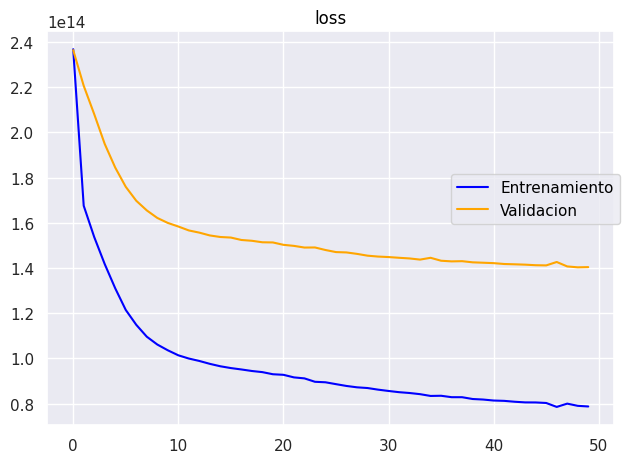

In [ ]:
# Armamos una funcion para graficar el error a través de las épocas
def graficar_error(history, error_name):
    x_arr = np.array(history.epoch)    # en el atributo epoch, history guarda una lista de epocas
    plot = (
        so.Plot()
        .add(so.Line(color='blue'), x=x_arr, y=history.history[error_name], label='Entrenamiento')
        .add(so.Line(color='orange'), x=x_arr, y=history.history[f'val_{error_name}'], label='Validacion')
        .label(title=error_name)
    )
    plot.show()
# Graficamos la evolucion de la precision de la clasficiacion
graficar_error(hist, 'loss')

9c) Según el modelo desarrollado, entre los jugadores con un valor de mercado mayor a
$100000, ¿quién es el más sobrevalorado? Es decir, el jugador con mayor diferencia entre
el valor de mercado y el valor predicho por el modelo. ¿Y el más infravalorado?


In [ ]:
# Calculemos a los jugadores más sobre/infravalorados
data_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/transfermarkt_fbref_201920.csv', delimiter=";") #Cargo dataset transfermarkt_fbref_201920.csv
# Seleccionamos solo características numéricas para el escalado y la predicción
features_numericas = X

# Escalamos y convertimos a un DataFrame
X_scaled_df = pd.DataFrame(scaler.transform(features_numericas), columns=features_numericas.columns)

# Predecimos los valores de mercado usando el modelo
predictions = model.predict(X_scaled_df).flatten()

# Calculamos la diferencia entre el valor real y el valor predicho
diferencias = data['value'] - predictions

# Crear un DataFrame con las diferencias y los nombres de los jugadores
data_diferencias = pd.DataFrame()
data_diferencias['player'] = data_original['player']
data_diferencias['diferencia'] = diferencias

# Filtramos jugadores con valor de mercado mayor a $100,000
jugadores_mas_caros = data_original[data_original['value'] > 100000]

# Encontramos al más sobrevalorado y al más infravalorado
mas_sobrevalorado = jugadores_mas_caros.loc[data_diferencias['diferencia'].idxmax()]
mas_infravalorado = jugadores_mas_caros.loc[data_diferencias['diferencia'].idxmin()]

# Imprimir los resultados
print(f"El jugador más sobrevalorado es {mas_sobrevalorado['player']} con una diferencia de ${data_diferencias[data_diferencias['player'] == f'{mas_sobrevalorado.player}']['diferencia'].values[0]}")
print(f"El jugador más infravalorado es {mas_infravalorado['player']} con una diferencia de ${data_diferencias[data_diferencias['player'] == f'{mas_infravalorado.player}']['diferencia'].values[0]}")

70/70 [==============================] - 0s 2ms/step
El jugador más sobrevalorado es Kylian Mbappé con una diferencia de $112331728.0
El jugador más infravalorado es Papu Gómez con una diferencia de $-53200232.0


Vemos que Kylian Mbappé tiene una diferencia positiva de $112.761.576, dado que la diferencia se calcula (diferencia = valor real - valor predicho), lo que indica que su valor real es mayor que el valor predicho por el modelo. Esto significa que el modelo subestima su valor real.
Papu Gómez en cambio, tiene una diferencia negativa de -53,353,112, lo que indica que su valor real es menor que el valor predicho por el modelo. Esto significa que el modelo sobreestima su valor real.

9d)El PSG quiere vender a Mbappé y reemplazarlo por otro jugador más barato. Hacer un listado de los 10 jugadores más parecidos a Mbappé según el criterio que elijan. De esos 10 jugadores, según el modelo que desarrollaron en el ítem anterior, ¿a qué jugador recomendarían teniendo en cuenta la valuación del mercado y la predicción del modelo? Para ese jugador, averiguar la valuación actual del jugador. ¿Hicieron una buena recomendación?

In [ ]:
# Usaremos KNN para determinar los jugadores más parecidos a Mbappé

data_ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/transfermarkt_fbref_201920.csv', delimiter=";") #Cargo dataset "transfermarkt_fbref_201920"
data_ = data_.dropna() # Eliminamos 417 filas con datos NaN

# Seleccionamos solo las columnas numéricas
X = data_.select_dtypes(include=[int, float])

# Escalamos los datos
scaler1 = StandardScaler()
X_scaled_ = scaler1.fit_transform(X)

# Obtenemos las características de Mbappé
mbappe_name = 'Kylian Mbappé'
Mbappe_features = X_scaled_[data_['player'] == mbappe_name]

# Inicializamos NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=11) # 10 vecinos más cercanos
neighbors.fit(X_scaled_)

# Encontramos los índices y distancias de los jugadores más cercanos a Mbappé
distancias, indices = neighbors.kneighbors(Mbappe_features)

# Mostramos los nombres de los jugadores más cercanos a Mbappé
jugadores_cercanos = data_.iloc[indices[0]]['player'].values

print(f"Jugadores más cercanos a {mbappe_name}:")
print(jugadores_cercanos)

# Obtenemos el valor de Mbappé
mbappe_value = data_.loc[data_['player'] == mbappe_name]['value'].values[0]

# Obtenemos los valores de los jugadores más cercanos a Mbappé
jugadores_cercanos_values = data_.loc[data_['player'].isin(jugadores_cercanos), 'value'].values

# Comparar los valores de los jugadores más cercanos con el valor REAL (de mercado) de Mbappé
jugadores_cercanos_mbappe_value = jugadores_cercanos[jugadores_cercanos_values < mbappe_value]

# Mostramos los jugadores más cercanos a Mbappé pero más baratos (según el mercado)
print(f"\n Jugadores similares a {mbappe_name} pero más baratos (según el mercado):")
print(jugadores_cercanos_mbappe_value)


Jugadores más cercanos a Kylian Mbappé:
['Kylian Mbappé' 'Serge Gnabry' 'Duván Zapata' 'Timo Werner'
 'Gabriel Jesus' 'Luis Suárez' 'Christian Pulisic' 'Sergio AgíĽero'
 'Raheem Sterling' 'Marcus Thuram' 'Philippe Coutinho']

 Jugadores similares a Kylian Mbappé pero más baratos (según el mercado):
['Kylian Mbappé' 'Serge Gnabry' 'Duván Zapata' 'Timo Werner'
 'Gabriel Jesus' 'Luis Suárez' 'Christian Pulisic' 'Sergio AgíĽero'
 'Raheem Sterling' 'Philippe Coutinho']


In [ ]:
# ¿A que jugador recomendarian teniendo en cuenta la valuacion del mercado y la prediccion del modelo?
# Dataset filtrado con los 10 personas mas cercanas a Mbappe
data_cercano_mbappe_graph = data_.loc[data_['player'].isin(jugadores_cercanos)] # DataFrame con los 10 jugadores más cercanos a Messi

# Borramos a Mbappe
data_cercano_mbappe_graph = data_cercano_mbappe_graph[data_cercano_mbappe_graph['player'] != mbappe_name]

# Borramos las variables categoricas
data_cercano_mbappe_graph = data_cercano_mbappe_graph.select_dtypes(include=[int, float])

# Borramos a Mbappe
jugadores_cercanos = jugadores_cercanos[jugadores_cercanos != mbappe_name]

# Iteramos para cada jugador cercano a Mbappe utilizando la función del punto 9b)
for jugador in jugadores_cercanos:
    # Obtener los datos del jugador y determinar si es barato o no
    resultado = es_jugador_barato_o_acorde(jugador)
    if resultado is not None:
        print(f"{resultado}.")


1/1 [==============================] - 0s 24ms/step
Serge Gnabry es acorde.
1/1 [==============================] - 0s 29ms/step
Duván Zapata es barato.
1/1 [==============================] - 0s 23ms/step
Timo Werner es barato.
1/1 [==============================] - 0s 22ms/step
Gabriel Jesus es acorde.
1/1 [==============================] - 0s 28ms/step
Luis Suárez es barato.
1/1 [==============================] - 0s 25ms/step
Christian Pulisic es acorde.
1/1 [==============================] - 0s 26ms/step
Sergio AgíĽero es acorde.
1/1 [==============================] - 0s 27ms/step
Raheem Sterling es acorde.
1/1 [==============================] - 0s 28ms/step
Marcus Thuram es barato.
1/1 [==============================] - 0s 24ms/step
Philippe Coutinho es acorde.


Finalmente obtenemos que un jugador más barato que Mbappé que recomendariamos al PSG teniendo en cuenta la valuación del mercado y la predicción del modelo es Duván Zapata.

Comprobemos si Duván Zapata es realmente una buena recomendación viendo su valuación en el mercado.

In [ ]:
# Buscamos la valuación en el mercado de Duván Zapata
data_Zapata = data_original[data_original['player'] == 'Duván Zapata']['value'].values[0]
print(f"La valuación en el mercado de Duván Zapata es de : ${data_Zapata}")

# Buscamos la valuación en el mercado de Mbappe
data_Mbappe = data_original[data_original['player'] == 'Kylian Mbappé']['value'].values[0]
print(f"La valuación en el mercado de Kylian Mbappé es de : ${data_Mbappe}")

La valuación en el mercado de Duván Zapata es de : $36000000
La valuación en el mercado de Kylian Mbappé es de : $180000000


Vemos que efectivamente es una buena recomendación ya que el modelo de clasificación (KNN, junto con los datos de regresión mediante redes neuronales) predice que tienen características similares y en la valuación de mercado Duván Zapata es más barato que Kylian Mbappé.
La valuación actual según Transfermarket para Duván Zapata es de 8 millones de euros contra unos 180 millones de euros de Mbappé, por lo tanto sigue siendo más barato.